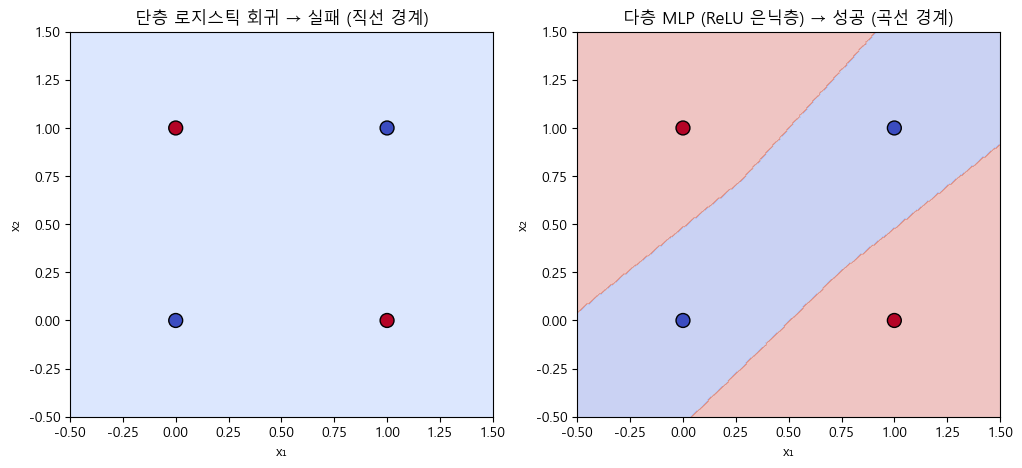

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])    # XOR 결과

# -------------------------------
# ① Softmax 회귀 (단층) -> LogisticRegression (단층)
# -------------------------------
# 'multi_class' 옵션을 제거하여 FutureWarning를 해결합니다.
# 이진 분류(y=0 or 1)이므로 기본값으로 두는 것이 올바릅니다.
softmax_clf = LogisticRegression(max_iter=1000) # <--- 수정됨
softmax_clf.fit(X, y)

# -------------------------------
# ② 다층 MLP (은닉층 2개 + ReLU)
# -------------------------------
mlp_clf = MLPClassifier(hidden_layer_sizes=(8, 8),
                         activation='relu',
                         max_iter=5000,
                         random_state=1)
mlp_clf.fit(X, y)

# -------------------------------
# 시각화용 격자(grid)
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)
Z2 = mlp_clf.predict(grid).reshape(xx.shape)

# -------------------------------
# 시각화
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# (1) 로지스틱 회귀 (단층)
axs[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[0].set_title("단층 로지스틱 회귀 → 실패 (직선 경계)") # <--- 제목 수정 (의미 명확화)

# (2) 다층 MLP
axs[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[1].set_title("다층 MLP (ReLU 은닉층) → 성공 (곡선 경계)")

for ax in axs:
     ax.set_xlabel("x₁")
     ax.set_ylabel("x₂")
     ax.set_xlim(-0.5, 1.5)
     ax.set_ylim(-0.5, 1.5)

plt.show()

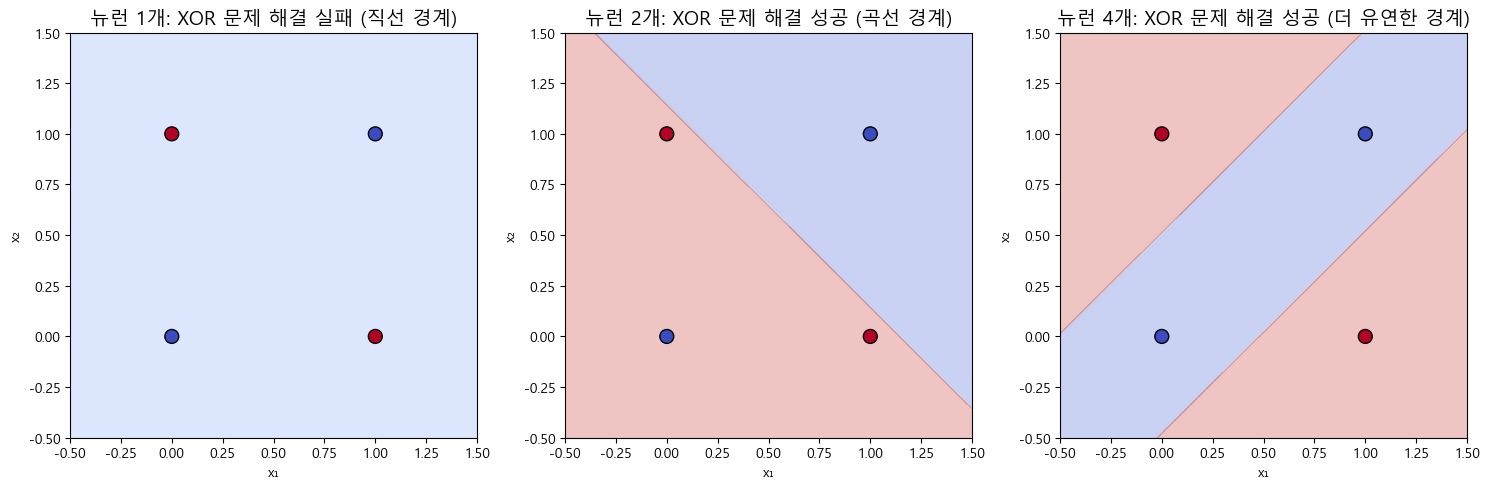

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic'
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic'
        except:
            pass

plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])    # XOR 결과

# -------------------------------
# 1. MLP 모델 정의 및 학습 (은닉층 1개 고정)
# -> random_state=2로 변경하여 학습 성공을 유도
# -------------------------------

# A. 뉴런 1개 모델 (실패)
mlp_1n = MLPClassifier(hidden_layer_sizes=(1,),
                      activation='relu',
                      max_iter=5000,
                      random_state=2) # <--- random_state=2로 변경
mlp_1n.fit(X, y)

# B. 뉴런 2개 모델 (최소 성공 조건)
mlp_2n = MLPClassifier(hidden_layer_sizes=(2,),
                      activation='relu',
                      max_iter=5000,
                      random_state=10) # <--- random_state=2로 변경
mlp_2n.fit(X, y)

# C. 뉴런 4개 모델 (여유 있는 성공 조건)
mlp_4n = MLPClassifier(hidden_layer_sizes=(4,),
                      activation='relu',
                      max_iter=5000,
                      random_state=1) # <--- random_state=2로 변경
mlp_4n.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측 결과 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                      np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = mlp_1n.predict(grid).reshape(xx.shape)
Z2 = mlp_2n.predict(grid).reshape(xx.shape)
Z3 = mlp_4n.predict(grid).reshape(xx.shape)

# -------------------------------
# 시각화 (1x3 서브플롯)
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# (1) 뉴런 1개
axs[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[0].set_title("뉴런 1개: XOR 문제 해결 실패 (직선 경계)", fontsize=14)

# (2) 뉴런 2개
axs[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[1].set_title("뉴런 2개: XOR 문제 해결 성공 (곡선 경계)", fontsize=14)

# (3) 뉴런 4개
axs[2].contourf(xx, yy, Z3, alpha=0.3, cmap='coolwarm')
axs[2].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[2].set_title("뉴런 4개: XOR 문제 해결 성공 (더 유연한 경계)", fontsize=14)

for ax in axs:
     ax.set_xlabel("x₁")
     ax.set_ylabel("x₂")
     ax.set_xlim(-0.5, 1.5)
     ax.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()


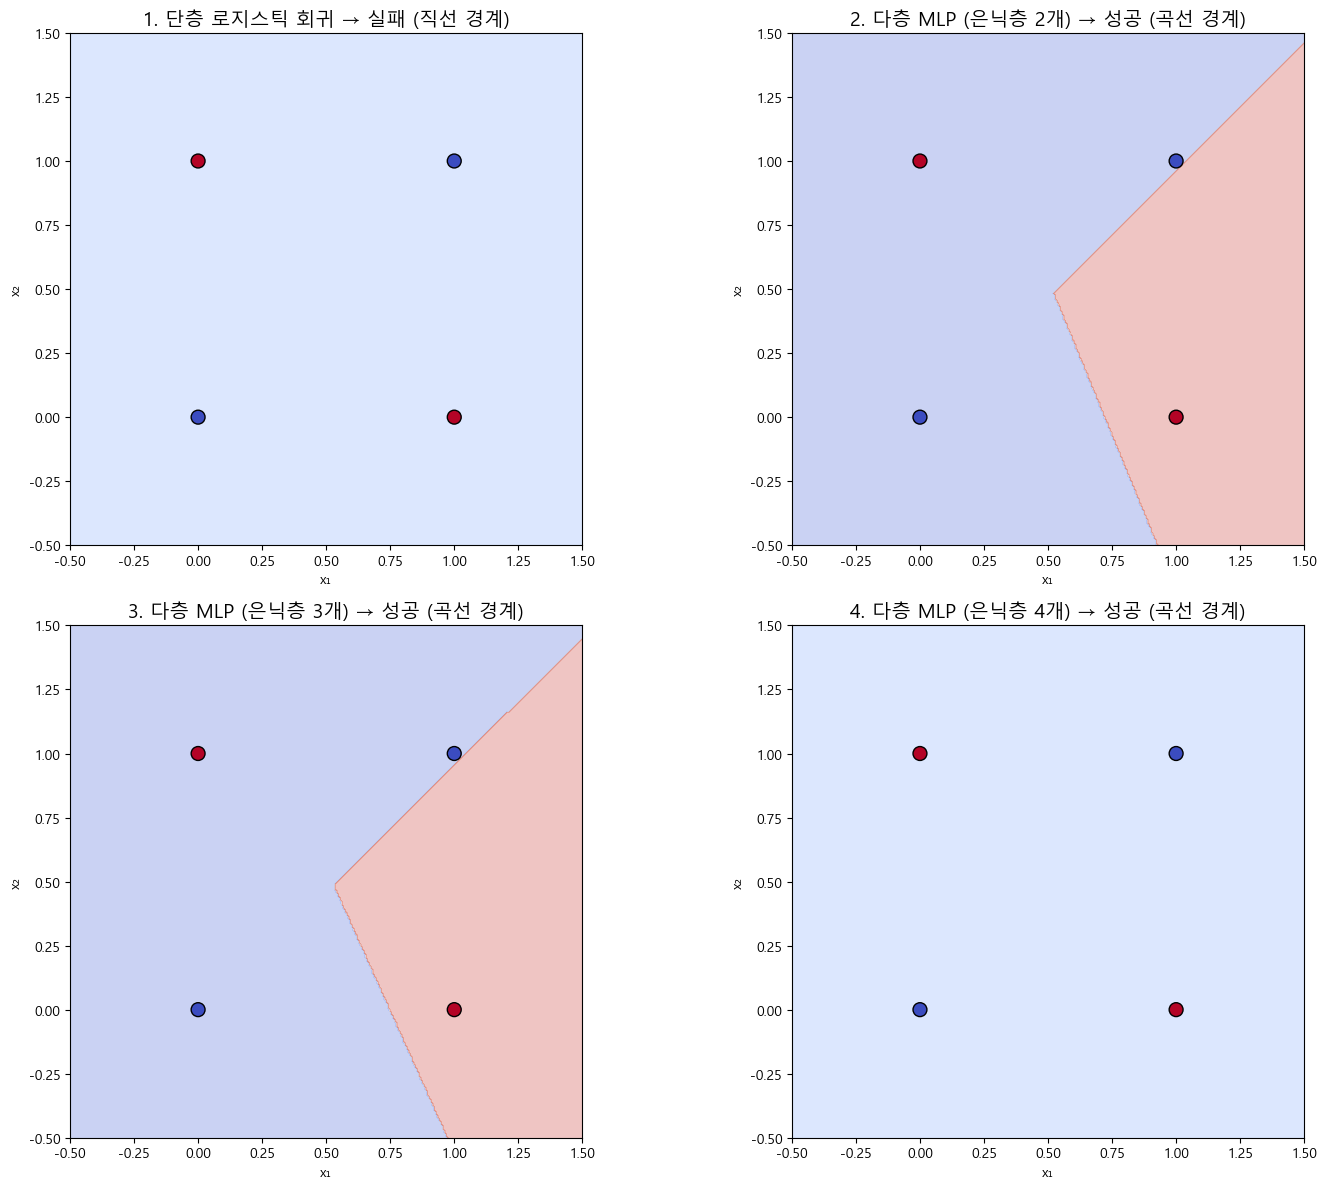

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])     # XOR 결과

# ------------------------------------------------
# 모델 정의 및 학습
# ------------------------------------------------

# 1. 단층 로지스틱 회귀 (Logistic Regression - Linear/Single Layer)
# multi_class 옵션을 제거하여 FutureWarning를 해결하고 기본 이진 분류를 사용
softmax_clf = LogisticRegression(max_iter=1000, random_state=1)
softmax_clf.fit(X, y)

# 2. 다층 MLP (은닉층 2개)
mlp_clf_2layer = MLPClassifier(hidden_layer_sizes=(4, 4), # 8개의 노드를 가진 은닉층 2개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_2layer.fit(X, y)

# 3. 다층 MLP (은닉층 3개)
mlp_clf_3layer = MLPClassifier(hidden_layer_sizes=(4, 4, 4), # 8개의 노드를 가진 은닉층 3개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3layer.fit(X, y)

# 4. 다층 MLP (은닉층 4개)
mlp_clf_4layer = MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4), # 8개의 노드를 가진 은닉층 4개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_4layer.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측값 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)       # 로지스틱 회귀 (단층)
Z2 = mlp_clf_2layer.predict(grid).reshape(xx.shape)    # MLP (2층)
Z3 = mlp_clf_3layer.predict(grid).reshape(xx.shape)    # MLP (3층)
Z4 = mlp_clf_4layer.predict(grid).reshape(xx.shape)    # MLP (4층)

# -------------------------------
# 2x2 서브플롯을 이용한 시각화
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel() # 서브플롯을 1차원 배열로 평탄화하여 반복문 사용 용이하게 함

# 모델 리스트와 제목
models_z = [Z1, Z2, Z3, Z4]
titles = [
    "1. 단층 로지스틱 회귀 → 실패 (직선 경계)",
    "2. 다층 MLP (은닉층 2개) → 성공 (곡선 경계)",
    "3. 다층 MLP (은닉층 3개) → 성공 (곡선 경계)",
    "4. 다층 MLP (은닉층 4개) → 성공 (곡선 경계)"
]

# 모든 서브플롯에 동일하게 시각화 요소 적용
for i, ax in enumerate(axs):
    ax.contourf(xx, yy, models_z[i], alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal', adjustable='box') # 정사각형 모양 유지

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show()


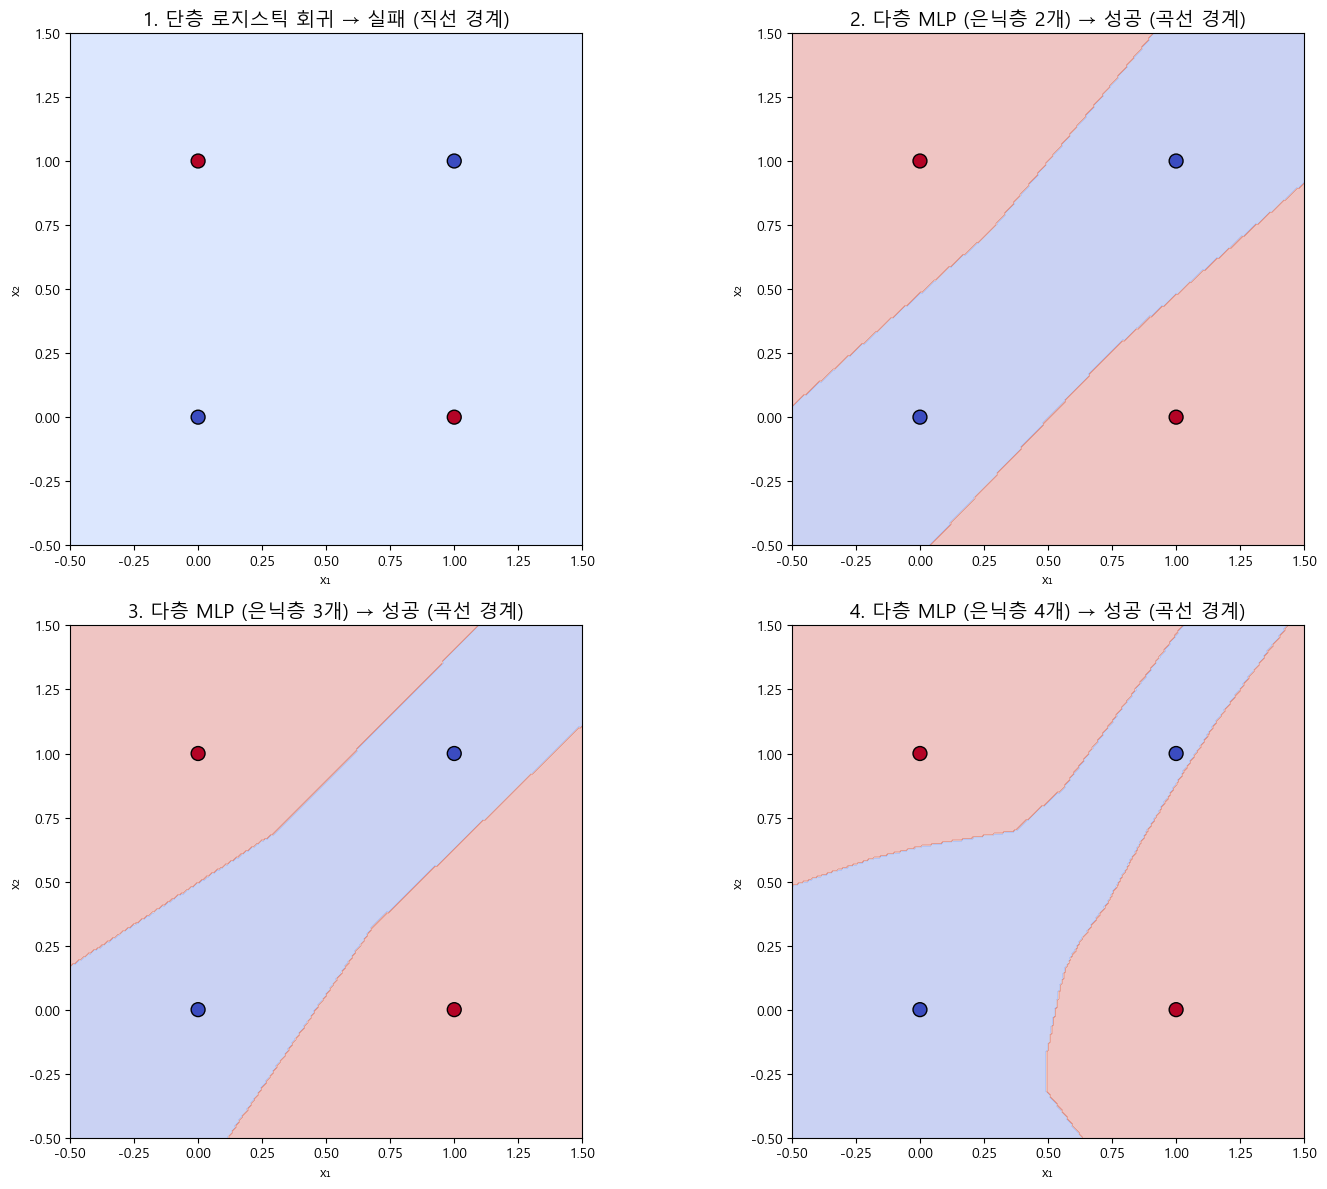

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])     # XOR 결과

# ------------------------------------------------
# 모델 정의 및 학습
# ------------------------------------------------

# 1. 단층 로지스틱 회귀 (Logistic Regression - Linear/Single Layer)
# multi_class 옵션을 제거하여 FutureWarning를 해결하고 기본 이진 분류를 사용
softmax_clf = LogisticRegression(max_iter=1000, random_state=1)
softmax_clf.fit(X, y)

# 2. 다층 MLP (은닉층 2개)
mlp_clf_2layer = MLPClassifier(hidden_layer_sizes=(8, 8), # 8개의 노드를 가진 은닉층 2개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_2layer.fit(X, y)

# 3. 다층 MLP (은닉층 3개)
mlp_clf_3layer = MLPClassifier(hidden_layer_sizes=(8, 8, 8), # 8개의 노드를 가진 은닉층 3개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3layer.fit(X, y)

# 4. 다층 MLP (은닉층 4개)
mlp_clf_4layer = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), # 8개의 노드를 가진 은닉층 4개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_4layer.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측값 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)       # 로지스틱 회귀 (단층)
Z2 = mlp_clf_2layer.predict(grid).reshape(xx.shape)    # MLP (2층)
Z3 = mlp_clf_3layer.predict(grid).reshape(xx.shape)    # MLP (3층)
Z4 = mlp_clf_4layer.predict(grid).reshape(xx.shape)    # MLP (4층)

# -------------------------------
# 2x2 서브플롯을 이용한 시각화
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel() # 서브플롯을 1차원 배열로 평탄화하여 반복문 사용 용이하게 함

# 모델 리스트와 제목
models_z = [Z1, Z2, Z3, Z4]
titles = [
    "1. 단층 로지스틱 회귀 → 실패 (직선 경계)",
    "2. 다층 MLP (은닉층 2개) → 성공 (곡선 경계)",
    "3. 다층 MLP (은닉층 3개) → 성공 (곡선 경계)",
    "4. 다층 MLP (은닉층 4개) → 성공 (곡선 경계)"
]

# 모든 서브플롯에 동일하게 시각화 요소 적용
for i, ax in enumerate(axs):
    ax.contourf(xx, yy, models_z[i], alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal', adjustable='box') # 정사각형 모양 유지

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show()


C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3182758951.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3182758951.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


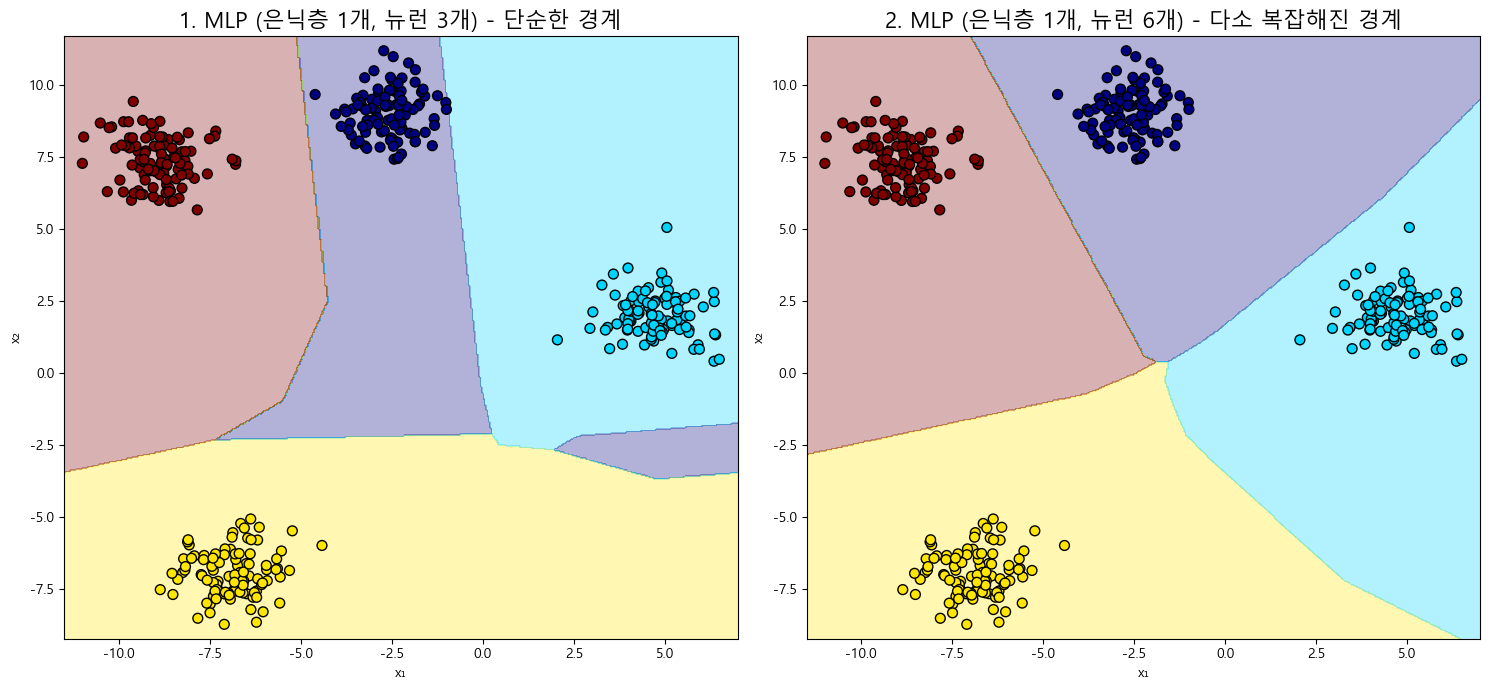

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성
# ------------------------------------------------
# n_samples: 데이터 포인트 수, centers: 클래스 수 (4개), random_state 고정
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# ------------------------------------------------
# 2. 모델 정의 및 학습 (모두 은닉층은 1개)
# ------------------------------------------------

# 2-1. MLP 모델 (은닉층 1개, 뉴런 3개)
# 뉴런 수를 3개로 단순화
mlp_clf_3neurons = MLPClassifier(hidden_layer_sizes=(3,), # <--- 은닉층 1개, 뉴런 3개로 수정
                               activation='relu',
                               solver='adam',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3neurons.fit(X, y)

# 2-2. MLP 모델 (은닉층 1개, 뉴런 6개)
# 뉴런 수를 6개로 단순화
mlp_clf_6neurons = MLPClassifier(hidden_layer_sizes=(6,), # <--- 은닉층 1개, 뉴런 6개로 수정
                               activation='relu',
                               solver='adam',
                               max_iter=5000,
                               random_state=1)
mlp_clf_6neurons.fit(X, y)


# -------------------------------
# 3. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# 각 모델의 예측값
Z_3neurons = mlp_clf_3neurons.predict(grid).reshape(xx.shape)
Z_6neurons = mlp_clf_6neurons.predict(grid).reshape(xx.shape)

# -------------------------------
# 4. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스를 시각화할 수 있는 'jet' 사용
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 1개, 뉴런 3개 MLP
axs[0].contourf(xx, yy, Z_3neurons, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title("1. MLP (은닉층 1개, 뉴런 3개) - 단순한 경계", fontsize=16)

# (2) 은닉층 1개, 뉴런 6개 MLP
axs[1].contourf(xx, yy, Z_6neurons, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title("2. MLP (은닉층 1개, 뉴런 6개) - 다소 복잡해진 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


C:\Users\dohoo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3747142110.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3747142110.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


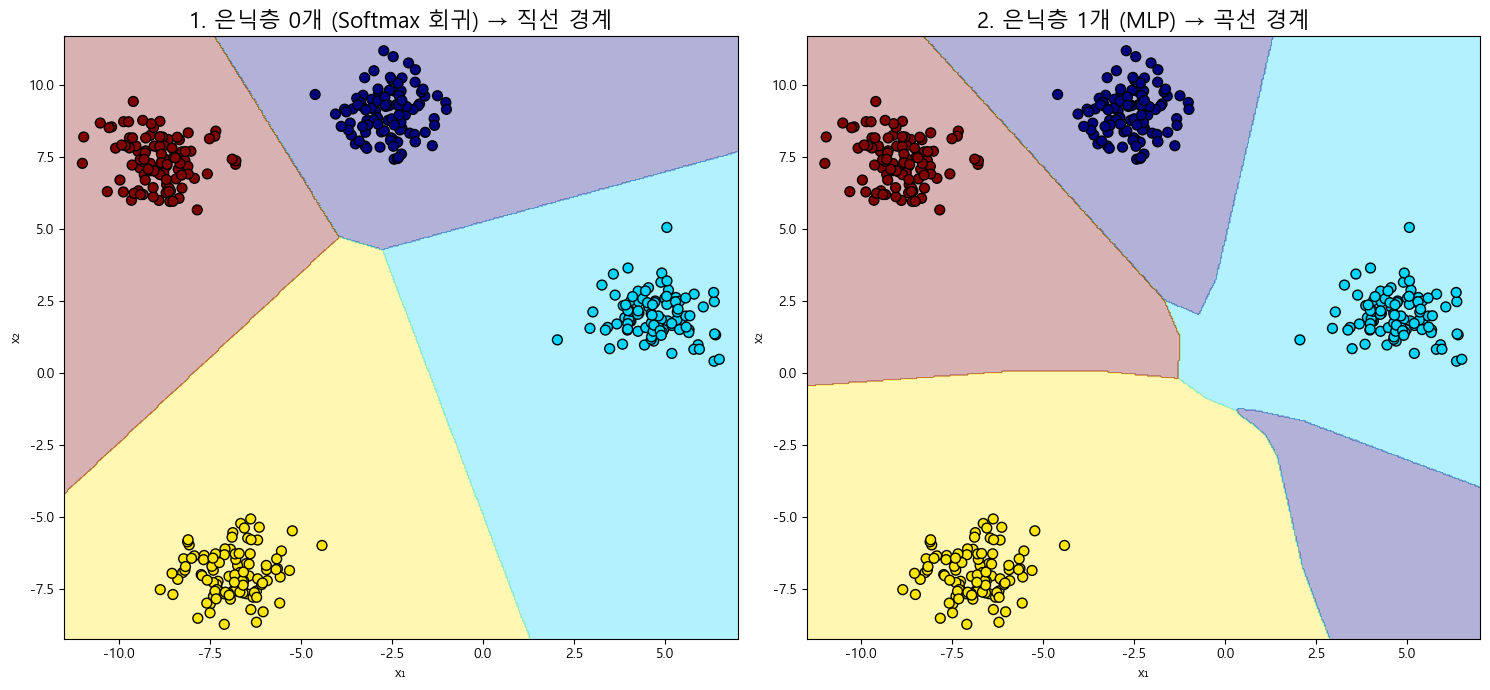

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정
# -------------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성 (이전과 동일)
# ------------------------------------------------
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# ------------------------------------------------
# 2. 모델 정의 및 학습 (은닉층 0개: Softmax 회귀)
# ------------------------------------------------
# LogisticRegression을 다중 클래스(4개)에 적용하면 Softmax 회귀가 됩니다.
# solver='lbfgs'는 안정적인 다중 분류를 위해 선택합니다.
# max_iter를 충분히 늘려야 수렴 경고를 피할 수 있습니다.
softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, random_state=1)
softmax_clf.fit(X, y)

# ------------------------------------------------
# 3. 비교용 MLP 모델 (은닉층 1개)
# ------------------------------------------------
# MLP는 곡선 경계가 나오는 것을 보여주기 위한 비교 대상입니다.
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=5000, random_state=1)
mlp_clf.fit(X, y)


# -------------------------------
# 4. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

Z_softmax = softmax_clf.predict(grid).reshape(xx.shape)
Z_mlp = mlp_clf.predict(grid).reshape(xx.shape)

# -------------------------------
# 5. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 0개: Softmax 회귀
axs[0].contourf(xx, yy, Z_softmax, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title("1. 은닉층 0개 (Softmax 회귀) → 직선 경계", fontsize=16)

# (2) 은닉층 1개: MLP (비교)
axs[1].contourf(xx, yy, Z_mlp, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title("2. 은닉층 1개 (MLP) → 곡선 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\1354301420.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\1354301420.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


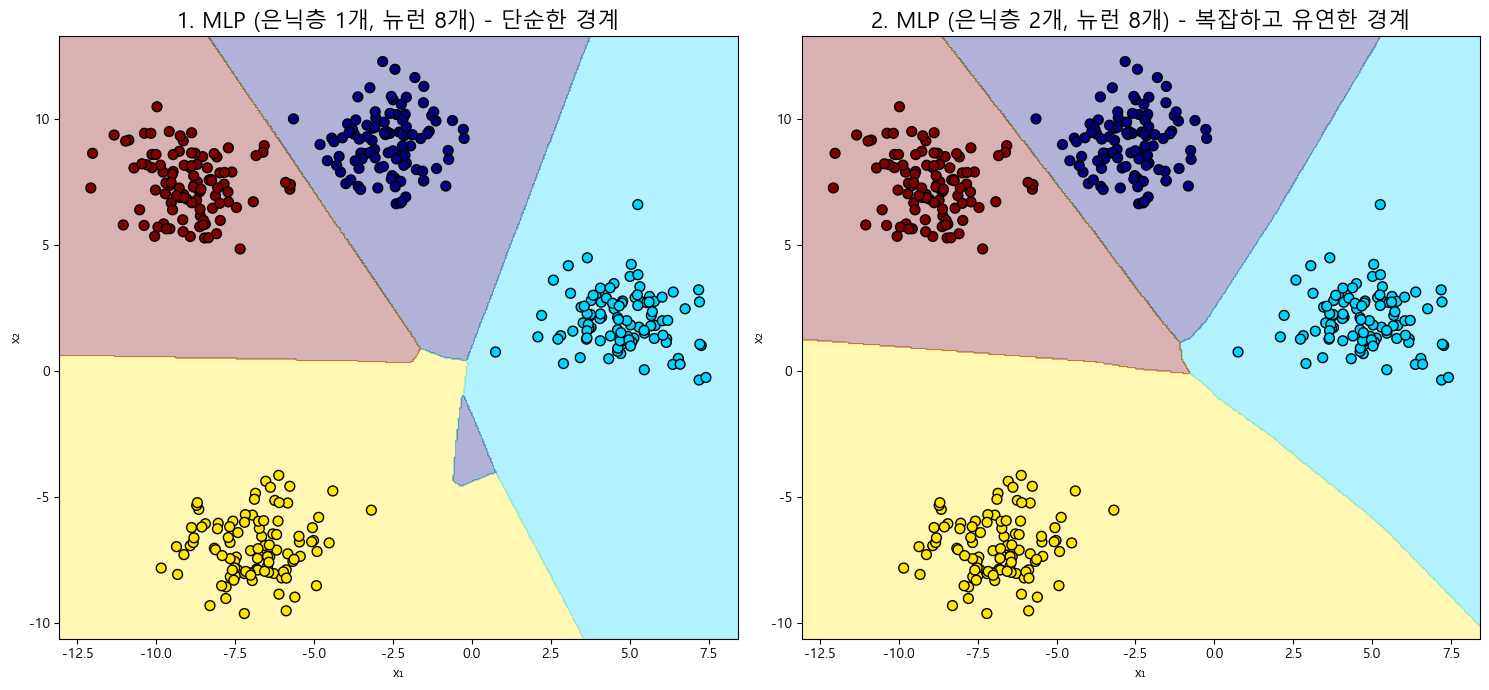

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
import warnings

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    # Windows 사용자
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    try:
        # macOS 사용자
        plt.rcParams['font.family'] = 'AppleGothic'
    except:
        try:
            # Linux 사용자 (나눔고딕 설치 필요)
            plt.rcParams['font.family'] = 'NanumGothic'
        except:
            pass # 폰트 설정 실패 시 기본 폰트 사용

plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성
# ------------------------------------------------
# n_samples: 데이터 포인트 수 (400개), centers: 클래스 수 (4개)
# cluster_std: 분산 정도 (클수록 겹침), random_state 고정
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42) # 분산(std)을 높여 경계를 더 잘 보이게 함

# ------------------------------------------------
# 2. 모델 정의 및 학습 (뉴런 6개 고정)
# ------------------------------------------------

NEURONS = 8 # 뉴런 수를 6개로 고정
RANDOM_SEED = 1 # 학습 시드 고정 (다중 클래스 문제에서 안정적인 시드)

# 2-1. MLP 모델 (은닉층 1개, 뉴런 6개)
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,), # (6,)
                            activation='relu',
                            solver='adam',
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# 2-2. MLP 모델 (은닉층 2개, 뉴런 6개)
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(NEURONS, NEURONS), # (6, 6)
                             activation='relu',
                             solver='adam',
                             max_iter=5000,
                             random_state=RANDOM_SEED)
mlp_2_layers.fit(X, y)


# -------------------------------
# 3. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# 각 모델의 예측값
Z_1_layer = mlp_1_layer.predict(grid).reshape(xx.shape)
Z_2_layers = mlp_2_layers.predict(grid).reshape(xx.shape)

# -------------------------------
# 4. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스를 시각화할 수 있는 'jet' 사용
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 1개, 뉴런 6개 MLP
axs[0].contourf(xx, yy, Z_1_layer, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title(f"1. MLP (은닉층 1개, 뉴런 {NEURONS}개) - 단순한 경계", fontsize=16)

# (2) 은닉층 2개, 뉴런 6개 MLP
axs[1].contourf(xx, yy, Z_2_layers, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title(f"2. MLP (은닉층 2개, 뉴런 {NEURONS}개) - 복잡하고 유연한 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


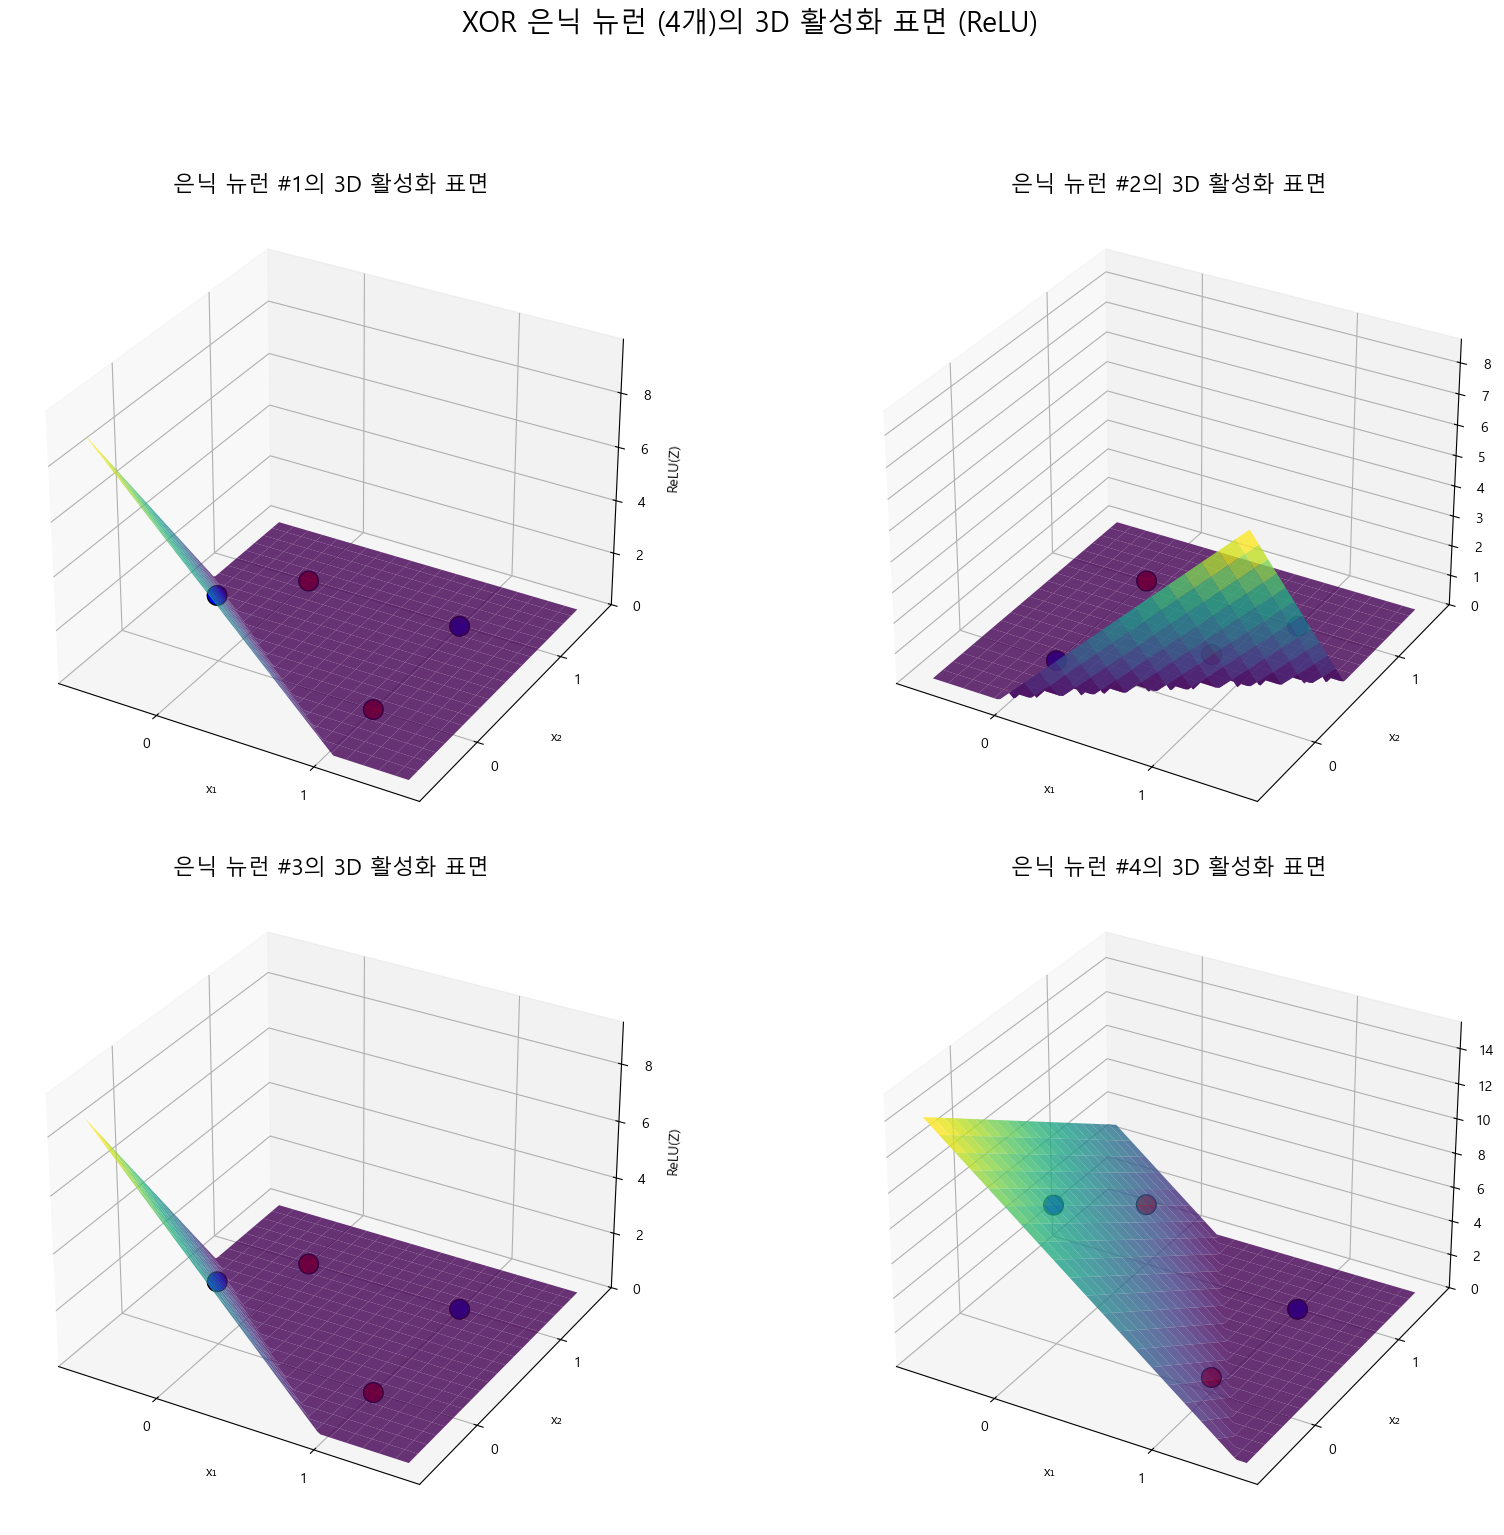

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (은닉층 1개, 뉴런 4개)
# ------------------------------------------------
NEURONS = 4
# ReLU와 (4,) 조합으로 XOR를 풀 수 있는 random_state
RANDOM_SEED = 1
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='relu', # ReLU 활성화 함수 사용
                            solver='adam',
                            learning_rate_init=0.1, # XOR는 학습률이 좀 높아야 잘됨
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. 은닉 뉴런의 '내부' 시각화
# -------------------------------

W1 = mlp_1_layer.coefs_[0]       # (2, 4)
b1 = mlp_1_layer.intercepts_[0]   # (4,)

fig = plt.figure(figsize=(18, 15))
fig.suptitle(f"XOR 은닉 뉴런 ({NEURONS}개)의 3D 활성화 표면 (ReLU)", fontsize=20, y=1.02)

for neuron_idx in range(NEURONS):
    # 각 뉴런의 선형 결합 (Z) 계산
    Z_i_linear = grid.dot(W1[:, neuron_idx]) + b1[neuron_idx]
    
    # ReLU 활성화 함수 적용 (Z축 높이)
    A_i_relu = np.maximum(0, Z_i_linear)
    
    # 격자 형태로 변환
    Z_grid = A_i_relu.reshape(xx.shape)
    
    # 3D 플롯 생성
    ax = fig.add_subplot(2, 2, neuron_idx + 1, projection='3d')
    
    # 표면 그리기 (cmap을 통해 높이 시각화)
    ax.plot_surface(xx, yy, Z_grid, cmap='viridis', alpha=0.8, rstride=5, cstride=5)
    
    # 3D 공간에 원본 데이터 점 뿌리기
    # 점의 Z 높이는 해당 위치의 A_i_relu 값 (활성화 정도)
    Z_points_for_scatter = np.maximum(0, X.dot(W1[:, neuron_idx]) + b1[neuron_idx])
    ax.scatter(X[:, 0], X[:, 1], Z_points_for_scatter, c=colors_data, s=200, edgecolor='k', depthshade=False)
    
    ax.set_title(f"은닉 뉴런 #{neuron_idx + 1}의 3D 활성화 표면", fontsize=16)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("ReLU(Z)")
    ax.set_zlim(0, Z_grid.max() * 1.1 + 0.1) # Z축 범위 조정
    ax.view_init(elev=30, azim=-60) # 뷰 각도 조정
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])

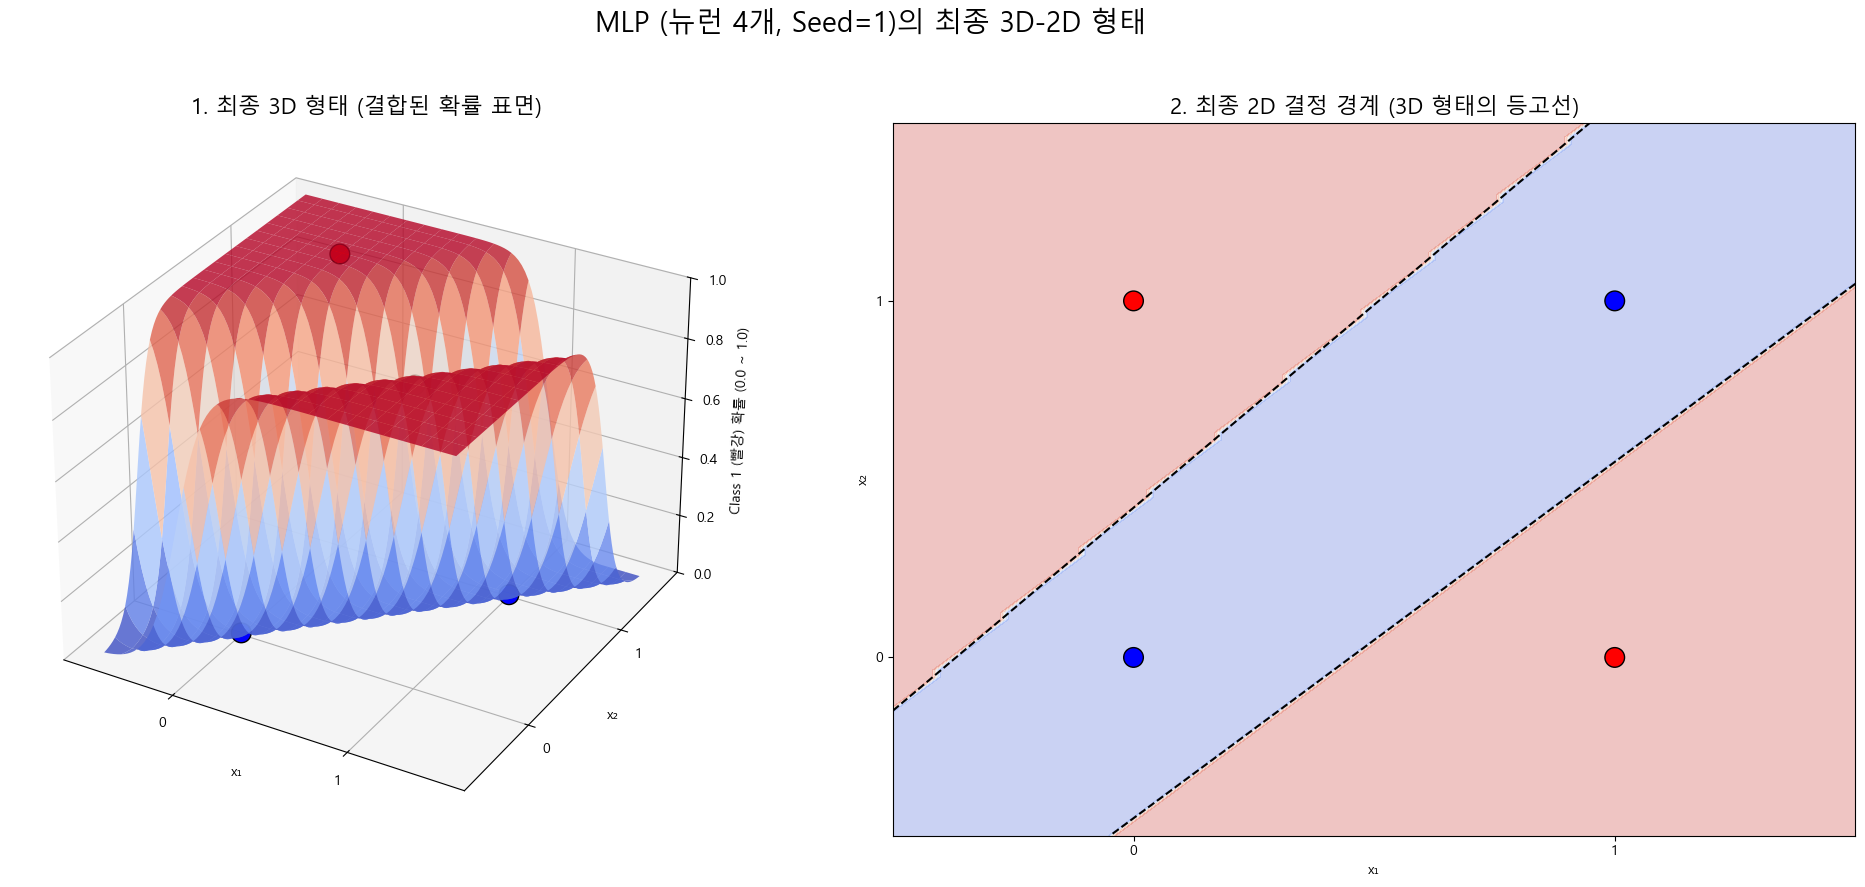

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (사용자님 코드와 동일, SEED = 1)
# ------------------------------------------------
NEURONS = 4
RANDOM_SEED = 1
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. "최종 형태" 계산
# -------------------------------

# 4-1. 최종 3D 형태 (Class 1 '빨강'일 확률)
# 이것이 4개 뉴런의 출력을 모두 조합한 "최종 지형"입니다.
Z_proba = mlp_1_layer.predict_proba(grid)[:, 1] # 1번 클래스(빨강)일 확률
Z_grid_proba = Z_proba.reshape(xx.shape)

# 4-2. 최종 2D 형태 (결정 경계)
Z_predict = mlp_1_layer.predict(grid).reshape(xx.shape)

# -------------------------------
# 5. 시각화 (3D 최종 형태 + 2D 등고선)
# -------------------------------

fig = plt.figure(figsize=(20, 9))
fig.suptitle(f"MLP (뉴런 {NEURONS}개, Seed={RANDOM_SEED})의 최종 3D-2D 형태", fontsize=20)

# --- 1번 플롯: 최종 3D 확률 표면 ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# coolwarm cmap: 0(파랑) ~ 1(빨강) 확률을 색상으로 표시
ax1.plot_surface(xx, yy, Z_grid_proba, cmap='coolwarm', alpha=0.8, rstride=5, cstride=5)

# 원본 데이터 점을 3D 확률 높이에 맞게 표시
Z_points_proba = mlp_1_layer.predict_proba(X)[:, 1]
ax1.scatter(X[:, 0], X[:, 1], Z_points_proba, c=colors_data, s=200, edgecolor='k', depthshade=False)

ax1.set_title("1. 최종 3D 형태 (결합된 확률 표면)", fontsize=16)
ax1.set_xlabel("x₁")
ax1.set_ylabel("x₂")
ax1.set_zlabel("Class 1 (빨강) 확률 (0.0 ~ 1.0)")
ax1.view_init(elev=30, azim=-60)
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_zlim(0, 1) # 확률이므로 Z축은 0에서 1 사이

# --- 2번 플롯: 최종 2D 결정 경계 ---
ax2 = fig.add_subplot(1, 2, 2)

# Z_predict (0 또는 1)
ax2.contourf(xx, yy, Z_predict, cmap='coolwarm', alpha=0.3)
# Z_proba (0.0 ~ 1.0) - 확률 등고선
ax2.contour(xx, yy, Z_grid_proba, levels=[0.5], colors='black', linestyles='--') # 0.5가 되는 지점(결정 경계)

ax2.scatter(X[:, 0], X[:, 1], c=colors_data, s=200, edgecolor='k')
ax2.set_title("2. 최종 2D 결정 경계 (3D 형태의 등고선)", fontsize=16)
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])


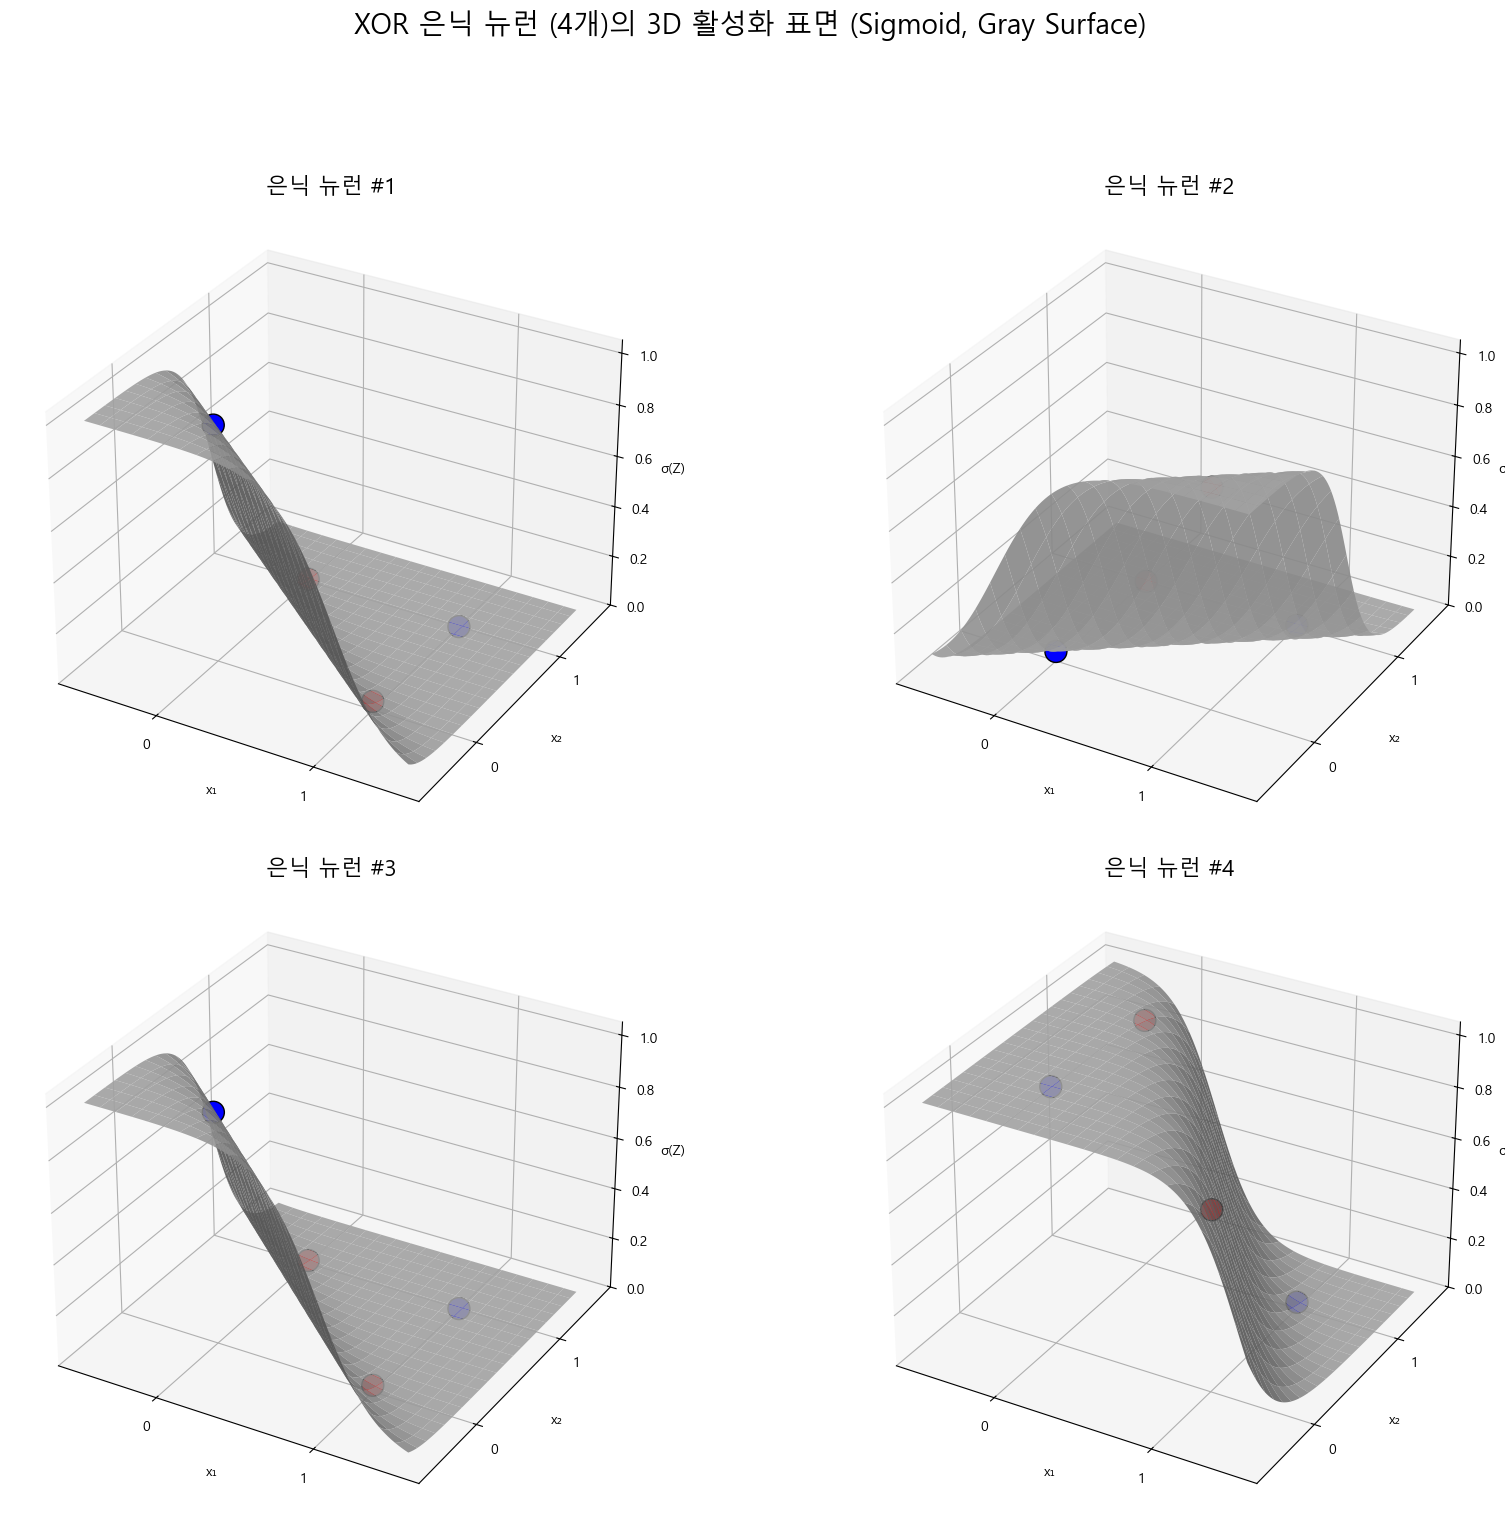

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
import warnings

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic'
    except:
        plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)

# -------------------------------
# 1. XOR 데이터
# -------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
colors_data = ['blue' if label == 0 else 'red' for label in y]

# -------------------------------
# 2. MLP 학습 (Sigmoid)
# -------------------------------
NEURONS = 4
RANDOM_SEED = 1
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='logistic',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_sigmoid.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. 가중치, 편향 추출
# -------------------------------
W1 = mlp_sigmoid.coefs_[0]
b1 = mlp_sigmoid.intercepts_[0]

# -------------------------------
# 5. 시각화
# -------------------------------
fig = plt.figure(figsize=(18, 15))
fig.suptitle(f"XOR 은닉 뉴런 ({NEURONS}개)의 3D 활성화 표면 (Sigmoid, Gray Surface)", fontsize=20, y=1.02)

for neuron_idx in range(NEURONS):
    # 선형결합 Z = w1*x1 + w2*x2 + b
    Z_i_linear = grid.dot(W1[:, neuron_idx]) + b1[neuron_idx]
    A_i_sigmoid = 1 / (1 + np.exp(-Z_i_linear))
    Z_grid = A_i_sigmoid.reshape(xx.shape)

    ax = fig.add_subplot(2, 2, neuron_idx + 1, projection='3d')

    # ✅ 표면은 회색으로 통일 (colormap 제거)
    ax.plot_surface(xx, yy, Z_grid, color='lightgray', alpha=0.9, rstride=5, cstride=5, edgecolor='none')

    # 입력 데이터에 대한 시그모이드 출력 (z좌표)
    Z_points_for_scatter = 1 / (1 + np.exp(-(X.dot(W1[:, neuron_idx]) + b1[neuron_idx])))

    # ✅ 데이터 점은 class 색으로 구분
    ax.scatter(X[:, 0], X[:, 1], Z_points_for_scatter, c=colors_data, s=250, edgecolor='k', depthshade=False)

    ax.set_title(f"은닉 뉴런 #{neuron_idx + 1}", fontsize=16)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("σ(Z)")
    ax.set_zlim(0, 1.05)
    ax.view_init(elev=30, azim=-60)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


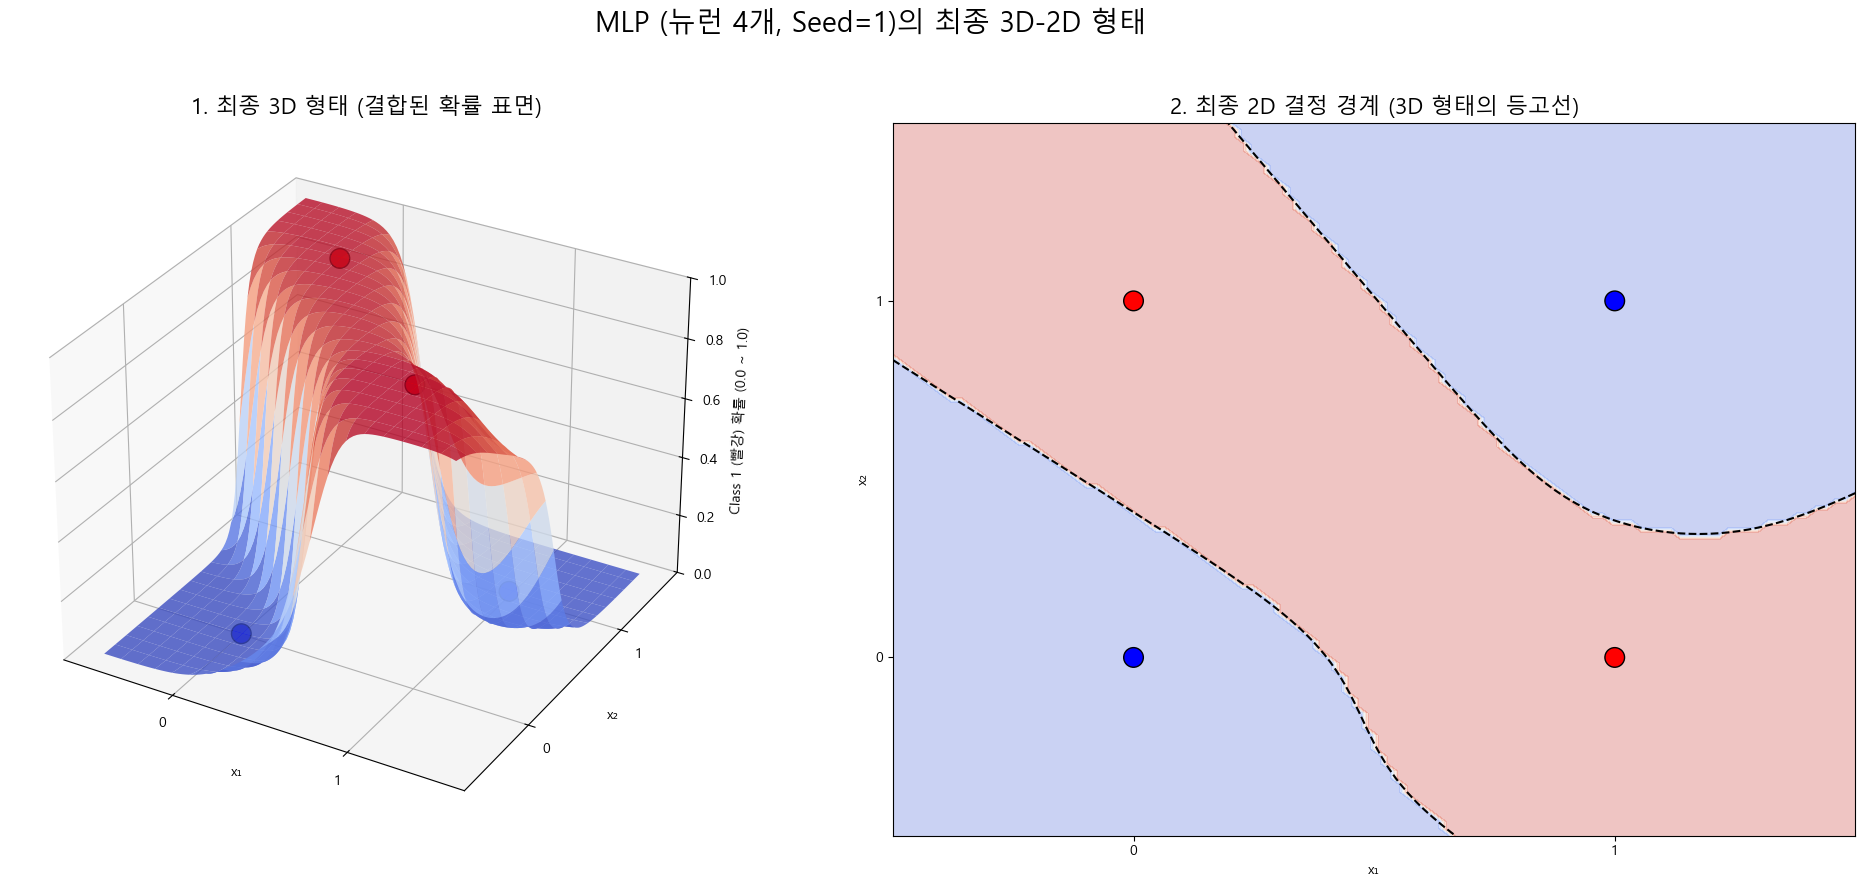

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (사용자님 코드와 동일, SEED = 1)
# ------------------------------------------------
NEURONS = 4
RANDOM_SEED = 1
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='logistic',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. "최종 형태" 계산
# -------------------------------

# 4-1. 최종 3D 형태 (Class 1 '빨강'일 확률)
# 이것이 4개 뉴런의 출력을 모두 조합한 "최종 지형"입니다.
Z_proba = mlp_1_layer.predict_proba(grid)[:, 1] # 1번 클래스(빨강)일 확률
Z_grid_proba = Z_proba.reshape(xx.shape)

# 4-2. 최종 2D 형태 (결정 경계)
Z_predict = mlp_1_layer.predict(grid).reshape(xx.shape)

# -------------------------------
# 5. 시각화 (3D 최종 형태 + 2D 등고선)
# -------------------------------

fig = plt.figure(figsize=(20, 9))
fig.suptitle(f"MLP (뉴런 {NEURONS}개, Seed={RANDOM_SEED})의 최종 3D-2D 형태", fontsize=20)

# --- 1번 플롯: 최종 3D 확률 표면 ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# coolwarm cmap: 0(파랑) ~ 1(빨강) 확률을 색상으로 표시
ax1.plot_surface(xx, yy, Z_grid_proba, cmap='coolwarm', alpha=0.8, rstride=5, cstride=5)

# 원본 데이터 점을 3D 확률 높이에 맞게 표시
Z_points_proba = mlp_1_layer.predict_proba(X)[:, 1]
ax1.scatter(X[:, 0], X[:, 1], Z_points_proba, c=colors_data, s=200, edgecolor='k', depthshade=False)

ax1.set_title("1. 최종 3D 형태 (결합된 확률 표면)", fontsize=16)
ax1.set_xlabel("x₁")
ax1.set_ylabel("x₂")
ax1.set_zlabel("Class 1 (빨강) 확률 (0.0 ~ 1.0)")
ax1.view_init(elev=30, azim=-60)
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_zlim(0, 1) # 확률이므로 Z축은 0에서 1 사이

# --- 2번 플롯: 최종 2D 결정 경계 ---
ax2 = fig.add_subplot(1, 2, 2)

# Z_predict (0 또는 1)
ax2.contourf(xx, yy, Z_predict, cmap='coolwarm', alpha=0.3)
# Z_proba (0.0 ~ 1.0) - 확률 등고선
ax2.contour(xx, yy, Z_grid_proba, levels=[0.5], colors='black', linestyles='--') # 0.5가 되는 지점(결정 경계)

ax2.scatter(X[:, 0], X[:, 1], c=colors_data, s=200, edgecolor='k')
ax2.set_title("2. 최종 2D 결정 경계 (3D 형태의 등고선)", fontsize=16)
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])


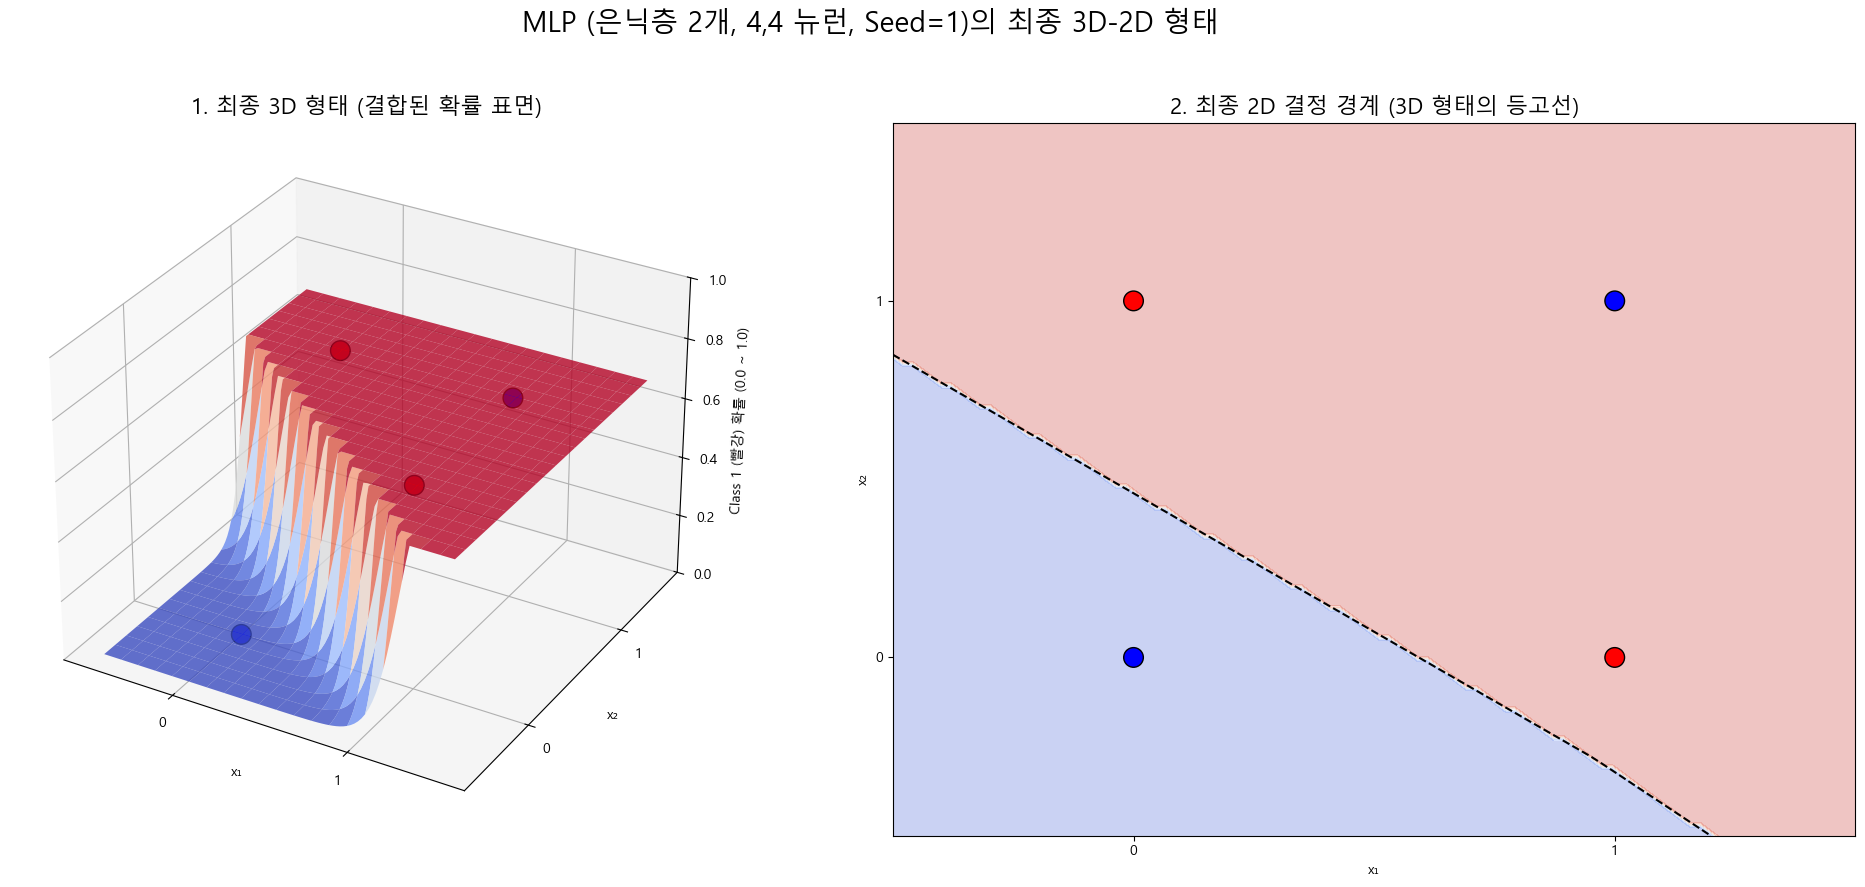

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (층을 2개로 늘림)
# ------------------------------------------------
NEURONS = 4
RANDOM_SEED = 1
# hidden_layer_sizes를 (NEURONS,) 에서 (NEURONS, NEURONS)로 변경
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(NEURONS, NEURONS), # <--- 수정됨
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_2_layers.fit(X, y) # mlp_1_layer -> mlp_2_layers

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. "최종 형태" 계산
# -------------------------------

# 4-1. 최종 3D 형태 (Class 1 '빨강'일 확률)
# 이것이 4x4 뉴런의 출력을 모두 조합한 "최종 지형"입니다.
Z_proba = mlp_2_layers.predict_proba(grid)[:, 1] # 1번 클래스(빨강)일 확률
Z_grid_proba = Z_proba.reshape(xx.shape)

# 4-2. 최종 2D 형태 (결정 경계)
Z_predict = mlp_2_layers.predict(grid).reshape(xx.shape)

# -------------------------------
# 5. 시각화 (3D 최종 형태 + 2D 등고선)
# -------------------------------

fig = plt.figure(figsize=(20, 9))
# 제목 수정
fig.suptitle(f"MLP (은닉층 2개, {NEURONS},{NEURONS} 뉴런, Seed={RANDOM_SEED})의 최종 3D-2D 형태", fontsize=20)

# --- 1번 플롯: 최종 3D 확률 표면 ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# coolwarm cmap: 0(파랑) ~ 1(빨강) 확률을 색상으로 표시
ax1.plot_surface(xx, yy, Z_grid_proba, cmap='coolwarm', alpha=0.8, rstride=5, cstride=5)

# 원본 데이터 점을 3D 확률 높이에 맞게 표시
Z_points_proba = mlp_2_layers.predict_proba(X)[:, 1] # mlp_1_layer -> mlp_2_layers
ax1.scatter(X[:, 0], X[:, 1], Z_points_proba, c=colors_data, s=200, edgecolor='k', depthshade=False)

ax1.set_title("1. 최종 3D 형태 (결합된 확률 표면)", fontsize=16)
ax1.set_xlabel("x₁")
ax1.set_ylabel("x₂")
ax1.set_zlabel("Class 1 (빨강) 확률 (0.0 ~ 1.0)")
ax1.view_init(elev=30, azim=-60)
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_zlim(0, 1) # 확률이므로 Z축은 0에서 1 사이

# --- 2번 플롯: 최종 2D 결정 경계 ---
ax2 = fig.add_subplot(1, 2, 2)

# Z_predict (0 또는 1)
ax2.contourf(xx, yy, Z_predict, cmap='coolwarm', alpha=0.3)
# Z_proba (0.0 ~ 1.0) - 확률 등고선
ax2.contour(xx, yy, Z_grid_proba, levels=[0.5], colors='black', linestyles='--') # 0.5가 되는 지점(결정 경계)

ax2.scatter(X[:, 0], X[:, 1], c=colors_data, s=200, edgecolor='k')
ax2.set_title("2. 최종 2D 결정 경계 (3D 형태의 등고선)", fontsize=16)
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])


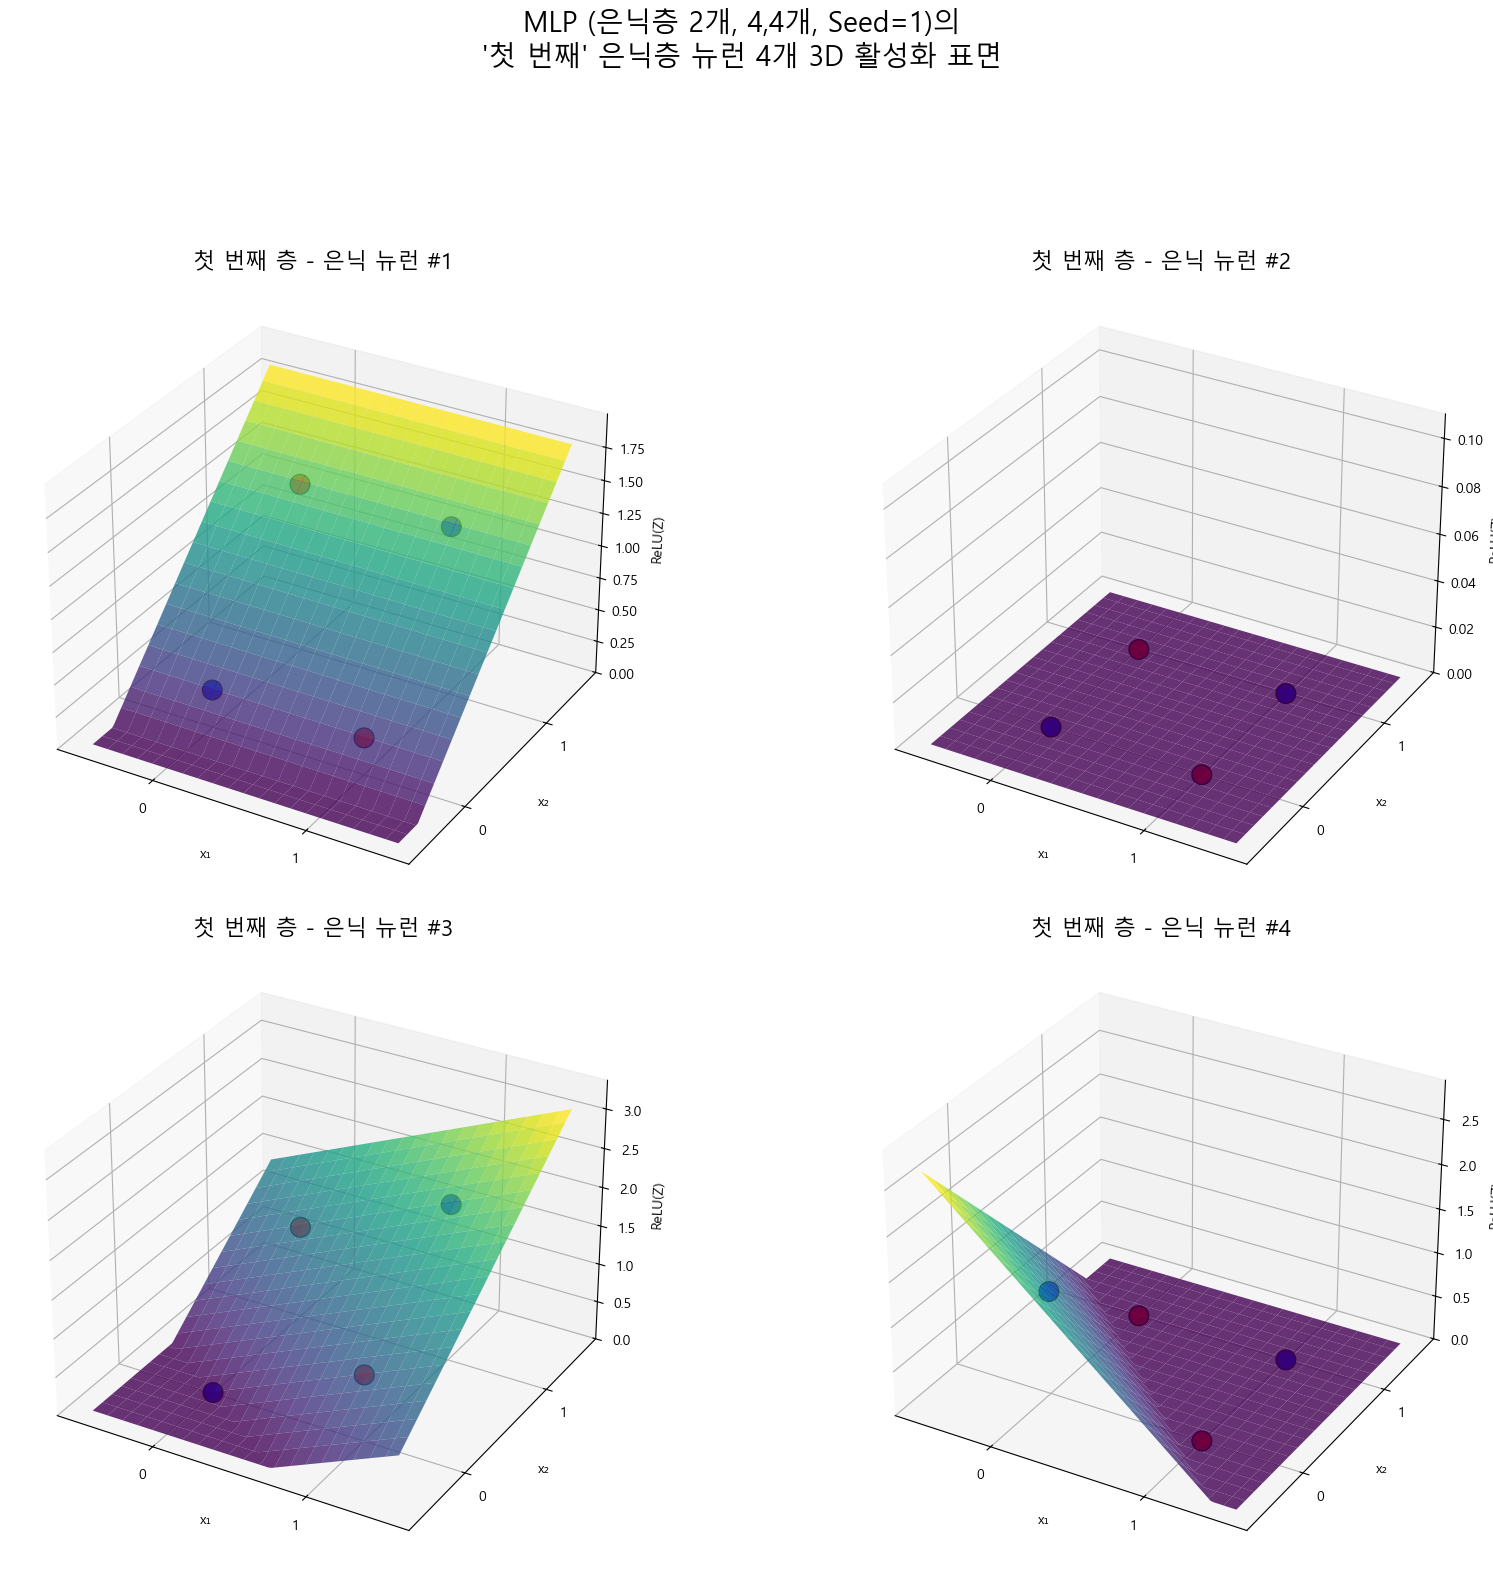

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (층 2개, SEED = 1)
# ------------------------------------------------
NEURONS = 4
RANDOM_SEED = 1
# 2개 층 모델
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(NEURONS, NEURONS), # (4, 4)
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_2_layers.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. "첫 번째" 은닉층 뉴런의 '내부' 시각화
# -------------------------------

# mlp_2_layers.coefs_는 [W1, W2] 리스트입니다.
# mlp_2_layers.intercepts_는 [b1, b2] 리스트입니다.
# 우리는 첫 번째 층의 가중치 W1, b1을 사용합니다.
W1 = mlp_2_layers.coefs_[0]       # (2, 4)
b1 = mlp_2_layers.intercepts_[0]   # (4,)

fig = plt.figure(figsize=(18, 15))
fig.suptitle(f"MLP (은닉층 2개, {NEURONS},{NEURONS}개, Seed={RANDOM_SEED})의\n'첫 번째' 은닉층 뉴런 4개 3D 활성화 표면", 
             fontsize=20, y=1.05) # 제목 수정

for neuron_idx in range(NEURONS):
    # 각 뉴런의 선형 결합 (Z) 계산
    Z_i_linear = grid.dot(W1[:, neuron_idx]) + b1[neuron_idx]
    
    # ReLU 활성화 함수 적용 (Z축 높이)
    A_i_relu = np.maximum(0, Z_i_linear)
    
    # 격자 형태로 변환
    Z_grid = A_i_relu.reshape(xx.shape)
    
    # 3D 플롯 생성
    ax = fig.add_subplot(2, 2, neuron_idx + 1, projection='3d')
    
    # 표면 그리기 (cmap을 통해 높이 시각화)
    ax.plot_surface(xx, yy, Z_grid, cmap='viridis', alpha=0.8, rstride=5, cstride=5)
    
    # 3D 공간에 원본 데이터 점 뿌리기
    Z_points_for_scatter = np.maximum(0, X.dot(W1[:, neuron_idx]) + b1[neuron_idx])
    ax.scatter(X[:, 0], X[:, 1], Z_points_for_scatter, c=colors_data, s=200, edgecolor='k', depthshade=False)
    
    ax.set_title(f"첫 번째 층 - 은닉 뉴런 #{neuron_idx + 1}", fontsize=16) # 제목 수정
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("ReLU(Z)")
    
    # Z축 범위가 너무 들쭉날쭉할 수 있으므로, 0을 포함하도록 조정
    z_max_val = np.max(Z_grid)
    if z_max_val < 1e-6: # 뉴런이 거의 '죽은' 경우
        z_max_val = 0.1 # 최소 높이 0.1로 설정
        
    ax.set_zlim(0, z_max_val * 1.1) 
    ax.view_init(elev=30, azim=-60)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])


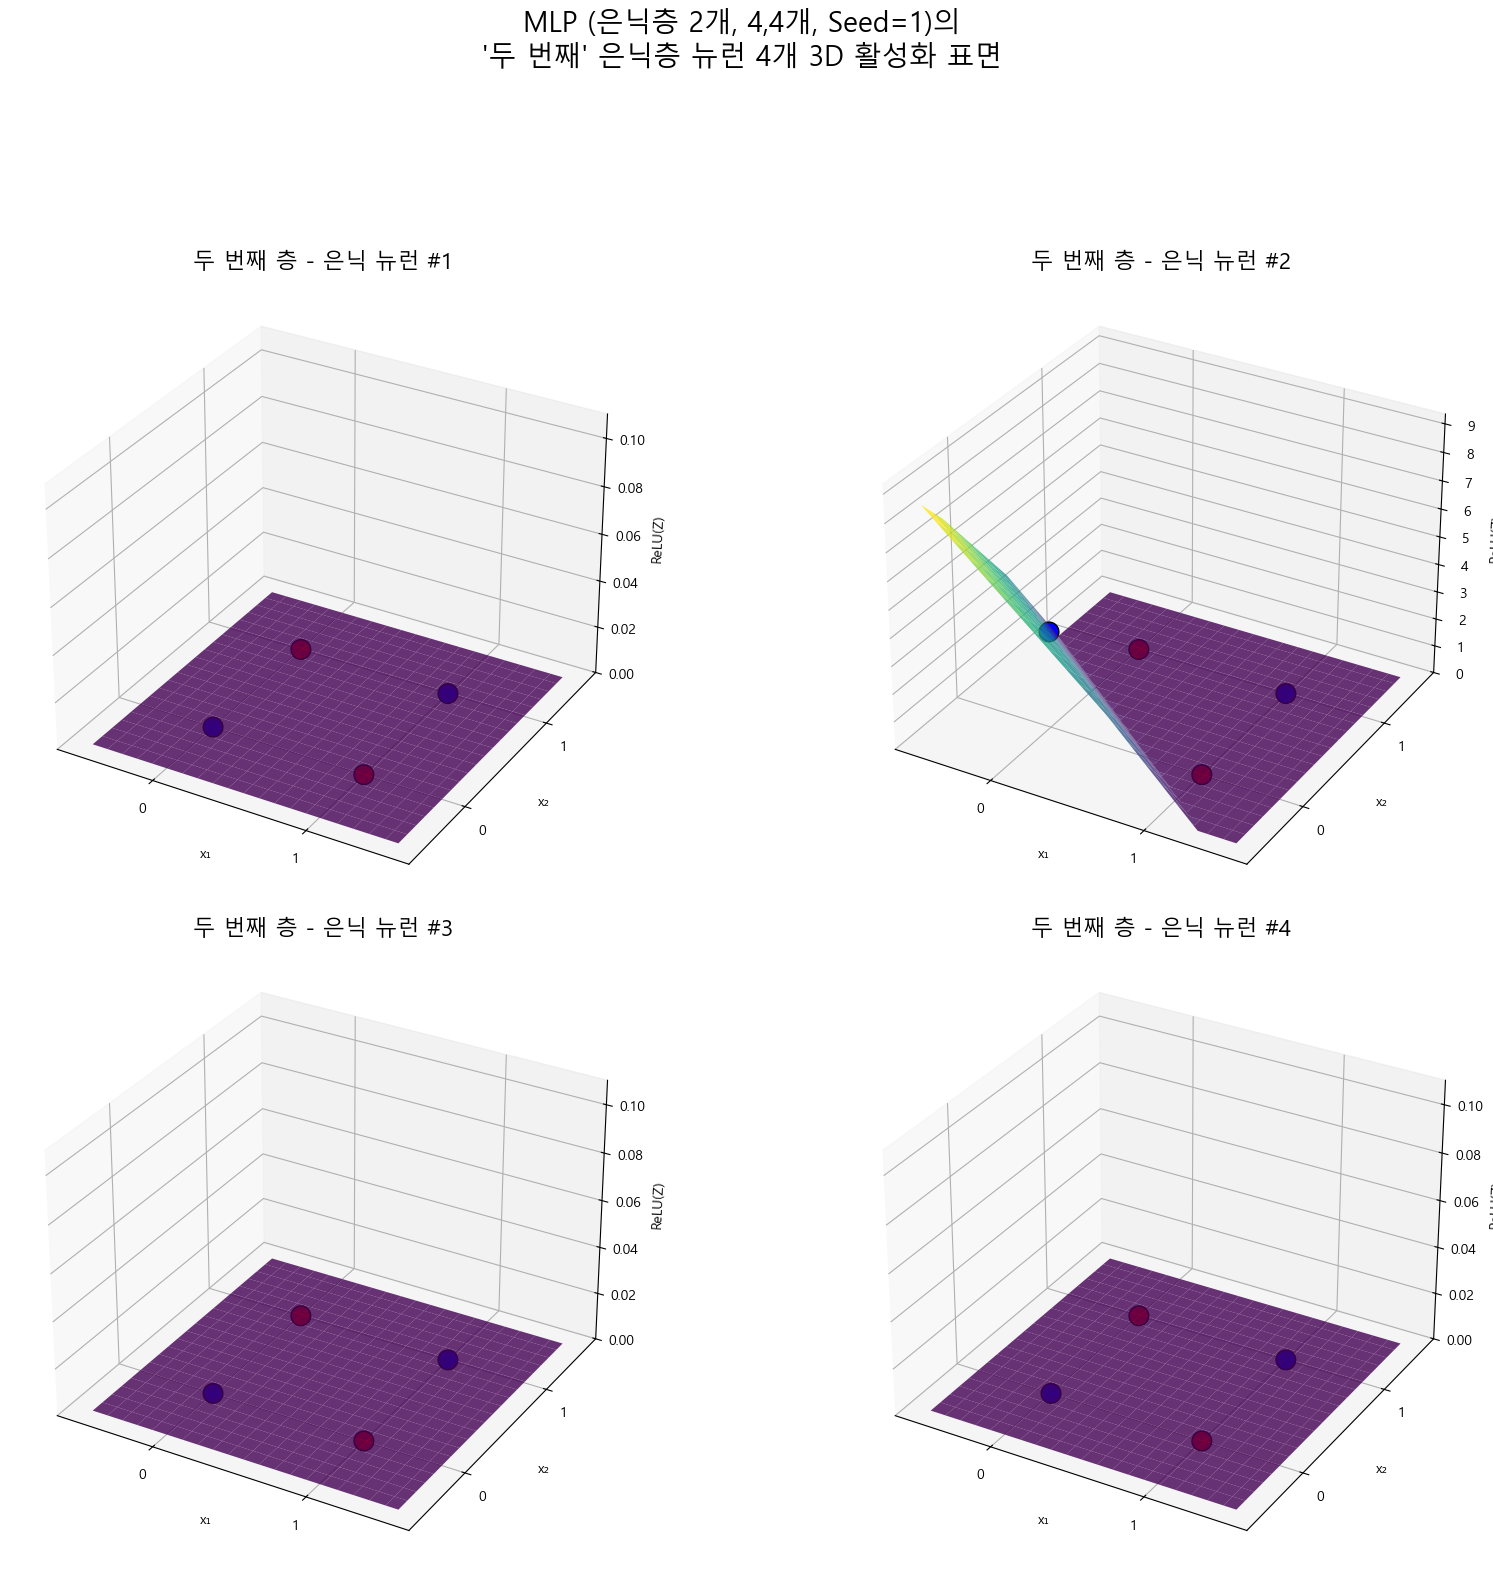

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. XOR 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors_data = ['blue' if label == 0 else 'red' for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (층 2개, SEED = 1)
# ------------------------------------------------
NEURONS = 4
RANDOM_SEED = 1
# 2개 층 모델
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(NEURONS, NEURONS), # (4, 4)
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.1,
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_2_layers.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. "두 번째" 은닉층 뉴런의 '내부' 시각화 <--- 수정됨
# -------------------------------

# [W1, W2]와 [b1, b2]를 모두 가져옵니다.
W1 = mlp_2_layers.coefs_[0]       # (2, 4) - 1층 가중치
b1 = mlp_2_layers.intercepts_[0]   # (4,) - 1층 편향
W2 = mlp_2_layers.coefs_[1]       # (4, 4) - 2층 가중치
b2 = mlp_2_layers.intercepts_[1]   # (4,) - 2층 편향

# 먼저, 격자(grid)에 대한 "첫 번째" 은닉층의 출력(A1)을 계산합니다.
# A1은 (10000, 4) 크기의 행렬이 됩니다.
A1_grid = np.maximum(0, grid.dot(W1) + b1)

# X (4개 점)에 대한 "첫 번째" 은닉층의 출력(A1)을 계산합니다.
A1_points = np.maximum(0, X.dot(W1) + b1)


fig = plt.figure(figsize=(18, 15))
# 제목 수정
fig.suptitle(f"MLP (은닉층 2개, {NEURONS},{NEURONS}개, Seed={RANDOM_SEED})의\n'두 번째' 은닉층 뉴런 4개 3D 활성화 표면", 
             fontsize=20, y=1.05) 

for neuron_idx in range(NEURONS):
    # --- 두 번째 층의 계산 ---
    # A1 (1층 출력)을 입력으로 받아 2층의 선형 결합(Z2)을 계산합니다.
    Z2_i_linear = A1_grid.dot(W2[:, neuron_idx]) + b2[neuron_idx]
    
    # 2층의 ReLU 활성화 함수 적용 (Z축 높이)
    A2_i_relu = np.maximum(0, Z2_i_linear)
    
    # 격자 형태로 변환
    Z_grid = A2_i_relu.reshape(xx.shape)
    
    # 3D 플롯 생성
    ax = fig.add_subplot(2, 2, neuron_idx + 1, projection='3d')
    
    # 표면 그리기 (cmap을 통해 높이 시각화)
    ax.plot_surface(xx, yy, Z_grid, cmap='viridis', alpha=0.8, rstride=5, cstride=5)
    
    # --- 3D 공간에 원본 데이터 점 뿌리기 ---
    # 4개 점에 대해서도 2층의 Z축 높이를 계산합니다.
    Z2_points_linear = A1_points.dot(W2[:, neuron_idx]) + b2[neuron_idx]
    Z_points_for_scatter = np.maximum(0, Z2_points_linear)
    
    ax.scatter(X[:, 0], X[:, 1], Z_points_for_scatter, c=colors_data, s=200, edgecolor='k', depthshade=False)
    
    ax.set_title(f"두 번째 층 - 은닉 뉴런 #{neuron_idx + 1}", fontsize=16) # 제목 수정
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("ReLU(Z)")
    
    # Z축 범위가 너무 들쭉날쭉할 수 있으므로, 0을 포함하도록 조정
    z_max_val = np.max(Z_grid)
    if z_max_val < 1e-6: # 뉴런이 거의 '죽은' 경우
        z_max_val = 0.1 # 최소 높이 0.1로 설정
        
    ax.set_zlim(0, z_max_val * 1.1) 
    ax.view_init(elev=30, azim=-60)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])

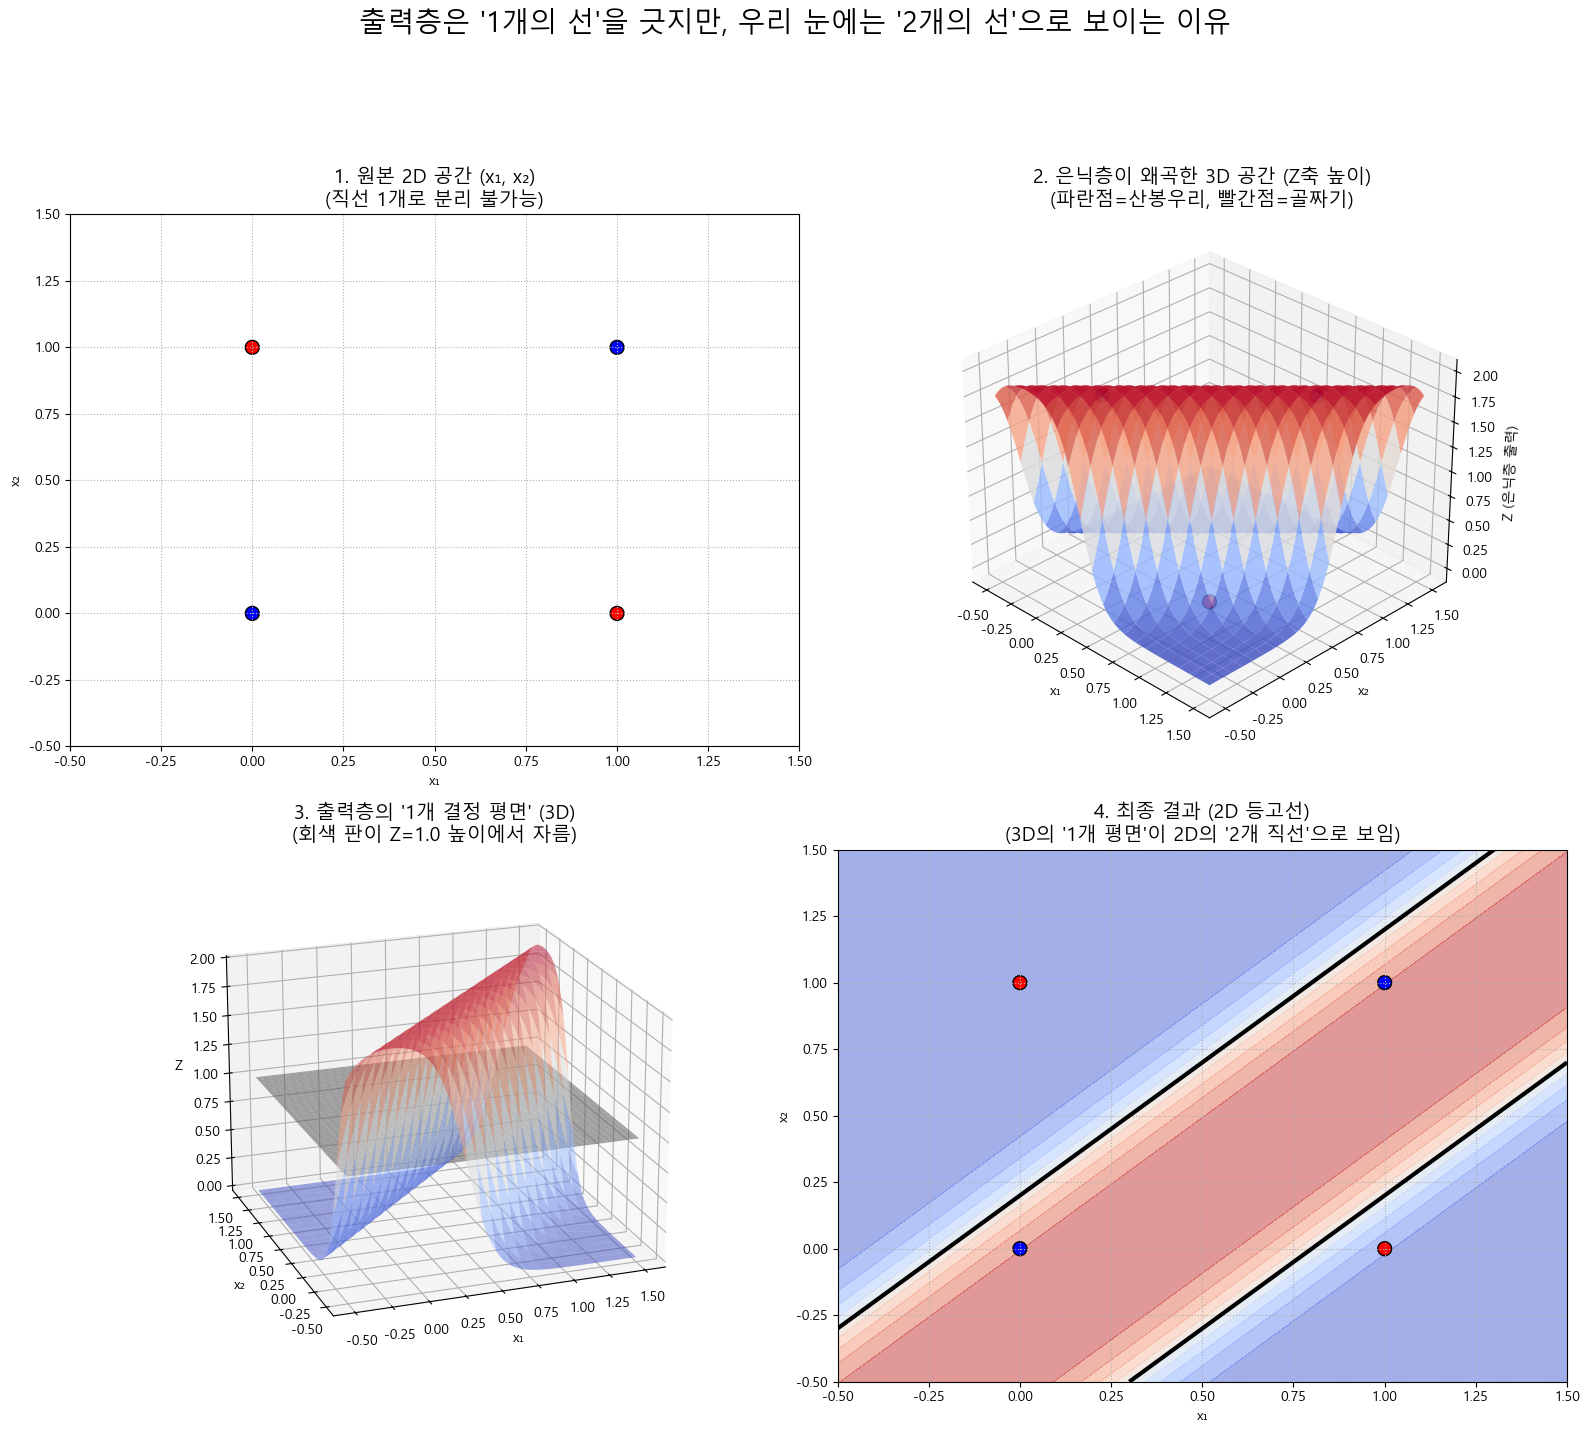

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass # 기본 폰트 사용
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# --- 1. 원본 XOR 데이터 ---
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]) # 0(파랑), 1(빨강)
colors = ['blue' if label == 0 else 'red' for label in y]

# --- 2. 시각화용 격자 및 '은닉층의 변환' 함수 ---
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
x1 = grid[:, 0]
x2 = grid[:, 1]

# "평행선 2개" 해법을 흉내내는 '은닉층의 변환' 함수 (Z축 높이)
# Z = H1 + H2 (H1, H2가 각각 평행선을 만듦)
# ReLU(x1-x2+...) + ReLU(-x1+x2+...) 형태
Z = np.tanh(5*x1 - 5*x2 + 1) - np.tanh(5*x1 - 5*x2 - 4)
Z_grid = Z.reshape(xx.shape)

# Z 값 확인 (파란점=높음, 빨간점=낮음)
# (0,0) -> tanh(1) - tanh(-4) ≈ 1.76 (높음)
# (1,1) -> tanh(1) - tanh(-4) ≈ 1.76 (높음)
# (0,1) -> tanh(-4) - tanh(-9) ≈ 0 (낮음)
# (1,0) -> tanh(6) - tanh(1)  ≈ 0.24 (낮음)
decision_level = 1.0 # 결정 평면의 높이 (출력층이 긋는 1개의 선)

# --- 3. 4개 그래프를 하나로 합치기 ---
fig = plt.figure(figsize=(16, 14))
fig.suptitle("출력층은 '1개의 선'을 긋지만, 우리 눈에는 '2개의 선'으로 보이는 이유", fontsize=20, y=1.02)

# --- 그래프 1: 원본 2D 공간 ---
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolor='k')
ax1.set_title("1. 원본 2D 공간 (x₁, x₂)\n(직선 1개로 분리 불가능)", fontsize=14)
ax1.set_xlabel("x₁")
ax1.set_ylabel("x₂")
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.grid(True, linestyle=':')

# --- 그래프 2: 은닉층이 왜곡한 3D 공간 ---
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, Z_grid, cmap='coolwarm', alpha=0.8, rstride=5, cstride=5)
# 3D 공간에 점 찍기
Z_points = np.tanh(5*X[:,0] - 5*X[:,1] + 1) - np.tanh(5*X[:,0] - 5*X[:,1] - 4)
ax2.scatter(X[:, 0], X[:, 1], Z_points, c=colors, s=100, edgecolor='k', depthshade=False)
ax2.set_title("2. 은닉층이 왜곡한 3D 공간 (Z축 높이)\n(파란점=산봉우리, 빨간점=골짜기)", fontsize=14)
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")
ax2.set_zlabel("Z (은닉층 출력)")
ax2.view_init(elev=30, azim=-45) # 3D 뷰 각도 조절

# --- 그래프 3: 출력층의 '1개' 결정 평면 (3D) ---
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_surface(xx, yy, Z_grid, cmap='coolwarm', alpha=0.5, rstride=5, cstride=5)
# "출력층의 1개 선" = Z=1.0 인 '평면'
ax3.plot_surface(xx, yy, np.full_like(Z_grid, decision_level), color='gray', alpha=0.6)
ax3.set_title("3. 출력층의 '1개 결정 평면' (3D)\n(회색 판이 Z=1.0 높이에서 자름)", fontsize=14)
ax3.set_xlabel("x₁")
ax3.set_ylabel("x₂")
ax3.set_zlabel("Z")
ax3.view_init(elev=20, azim=-110) # 자르는 평면이 잘 보이도록 각도 조절

# --- 그래프 4: 우리가 보는 최종 결과 (2D 등고선) ---
ax4 = fig.add_subplot(2, 2, 4)
# 3D 표면을 2D로 내려다본 등고선
ax4.contourf(xx, yy, Z_grid, cmap='coolwarm', alpha=0.5, levels=np.linspace(Z_grid.min(), Z_grid.max(), 11))
# "출력층의 1개 선"이 2D에서는 '2개의 선'으로 보임
ax4.contour(xx, yy, Z_grid, levels=[decision_level], colors='black', linewidths=3)
ax4.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolor='k')
ax4.set_title("4. 최종 결과 (2D 등고선)\n(3D의 '1개 평면'이 2D의 '2개 직선'으로 보임)", fontsize=14)
ax4.set_xlabel("x₁")
ax4.set_ylabel("x₂")
ax4.set_xlim(-0.5, 1.5)
ax4.set_ylim(-0.5, 1.5)
ax4.grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0, 1, 0.95])


C:\Users\bigcomlab\AppData\Local\Temp\ipykernel_17676\931106182.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)


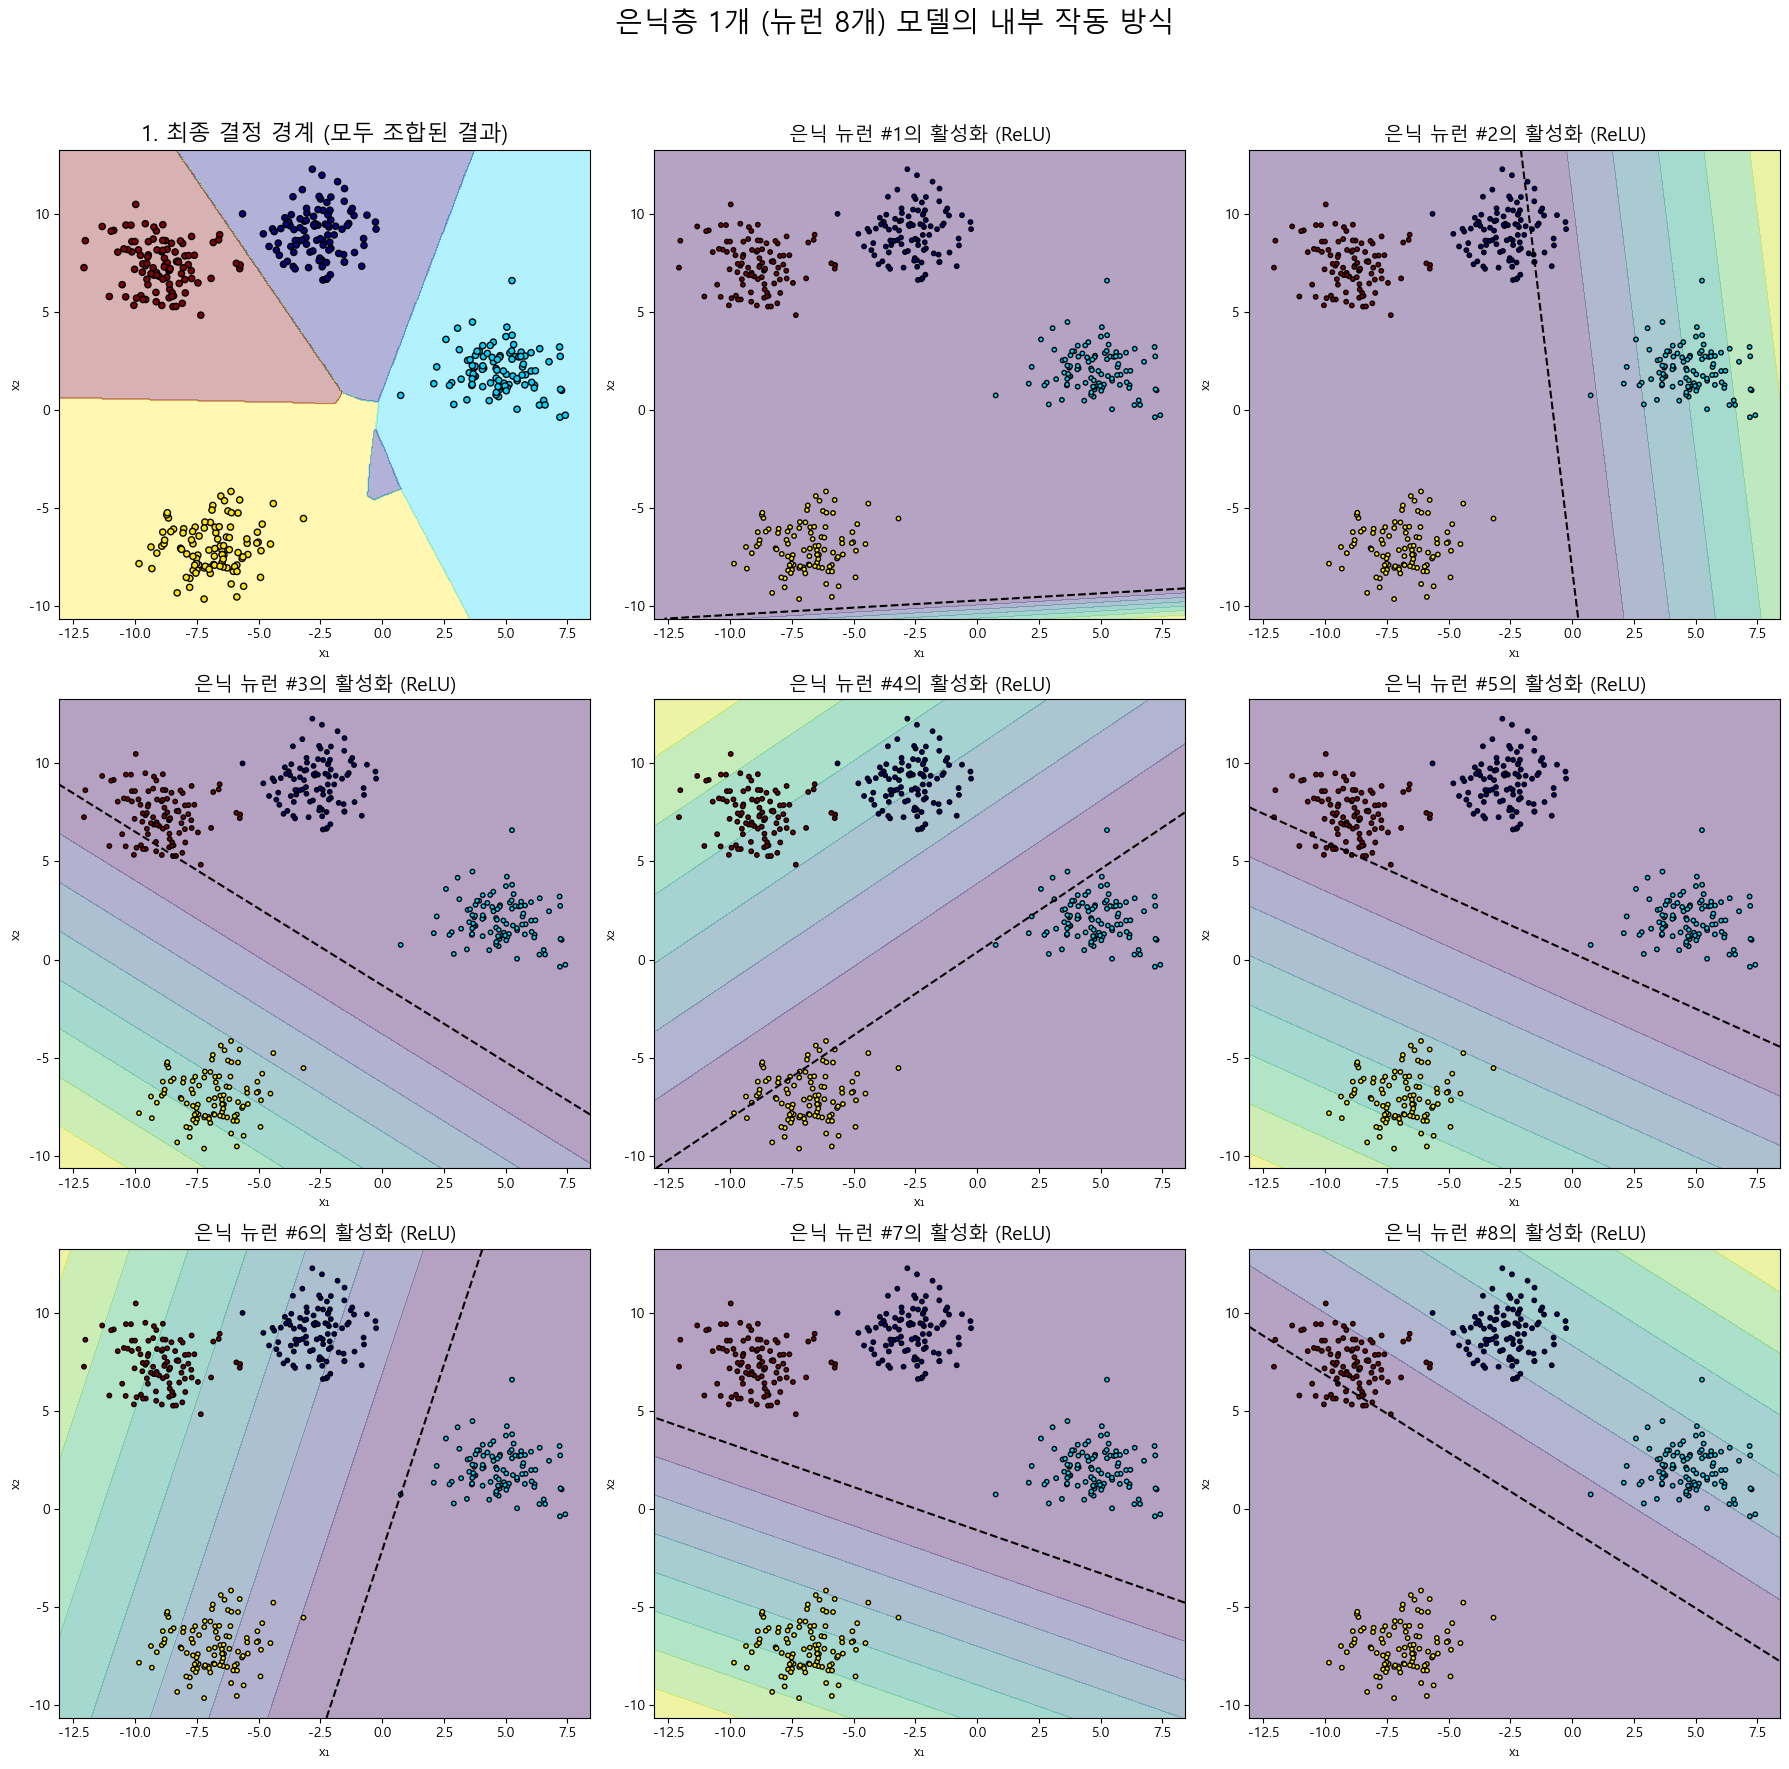

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
import warnings

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성 (사용자님 코드와 동일)
# ------------------------------------------------
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)
cmap_data = plt.cm.get_cmap('jet', 4)

# ------------------------------------------------
# 2. 모델 정의 및 학습 (뉴런 8개)
# ------------------------------------------------
NEURONS = 8
RANDOM_SEED = 1
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='relu',
                            solver='adam',
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. 은닉 뉴런의 '내부' 시각화
# -------------------------------

# 4-1. 첫 번째 은닉층의 가중치(W)와 편향(b) 추출
W1 = mlp_1_layer.coefs_[0]       # shape: (2, 8)
b1 = mlp_1_layer.intercepts_[0]   # shape: (8,)

# 4-2. 8개 뉴런의 선형 결합(Z)과 활성화(A) 계산
neuron_Z = [] # 선형 결합 (직선)
neuron_A = [] # ReLU 활성화 (접힌 면)
for i in range(NEURONS):
    # Z = (x1*w1 + x2*w2) + b
    Z_i = grid.dot(W1[:, i]) + b1[i]
    Z_i = Z_i.reshape(xx.shape)
    neuron_Z.append(Z_i)
    
    # A = ReLU(Z)
    A_i = np.maximum(0, Z_i) # ReLU
    neuron_A.append(A_i)

# -------------------------------
# 5. 시각화: 3x3 그리드
# -------------------------------
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle(f"은닉층 1개 (뉴런 {NEURONS}개) 모델의 내부 작동 방식", fontsize=20)

# 5-1. 최종 결정 경계 (첫 번째 칸)
Z_final = mlp_1_layer.predict(grid).reshape(xx.shape)
axs[0, 0].contourf(xx, yy, Z_final, alpha=0.3, cmap=cmap_data)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=cmap_data)
axs[0, 0].set_title("1. 최종 결정 경계 (모두 조합된 결과)", fontsize=16)

# 5-2. 8개 뉴런의 개별 활성화 영역
for i in range(NEURONS):
    row = (i + 1) // 3
    col = (i + 1) % 3
    
    ax = axs[row, col]
    
    # ReLU 활성화(A)를 색상으로 표시
    ax.contourf(xx, yy, neuron_A[i], alpha=0.4, cmap='viridis')
    
    # Z=0 (직선 경계)를 검은 점선으로 표시
    ax.contour(xx, yy, neuron_Z[i], levels=[0], colors='black', linestyles='--')
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, edgecolor='k', cmap=cmap_data)
    ax.set_title(f"은닉 뉴런 #{i+1}의 활성화 (ReLU)", fontsize=14)

for ax in axs.flat:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


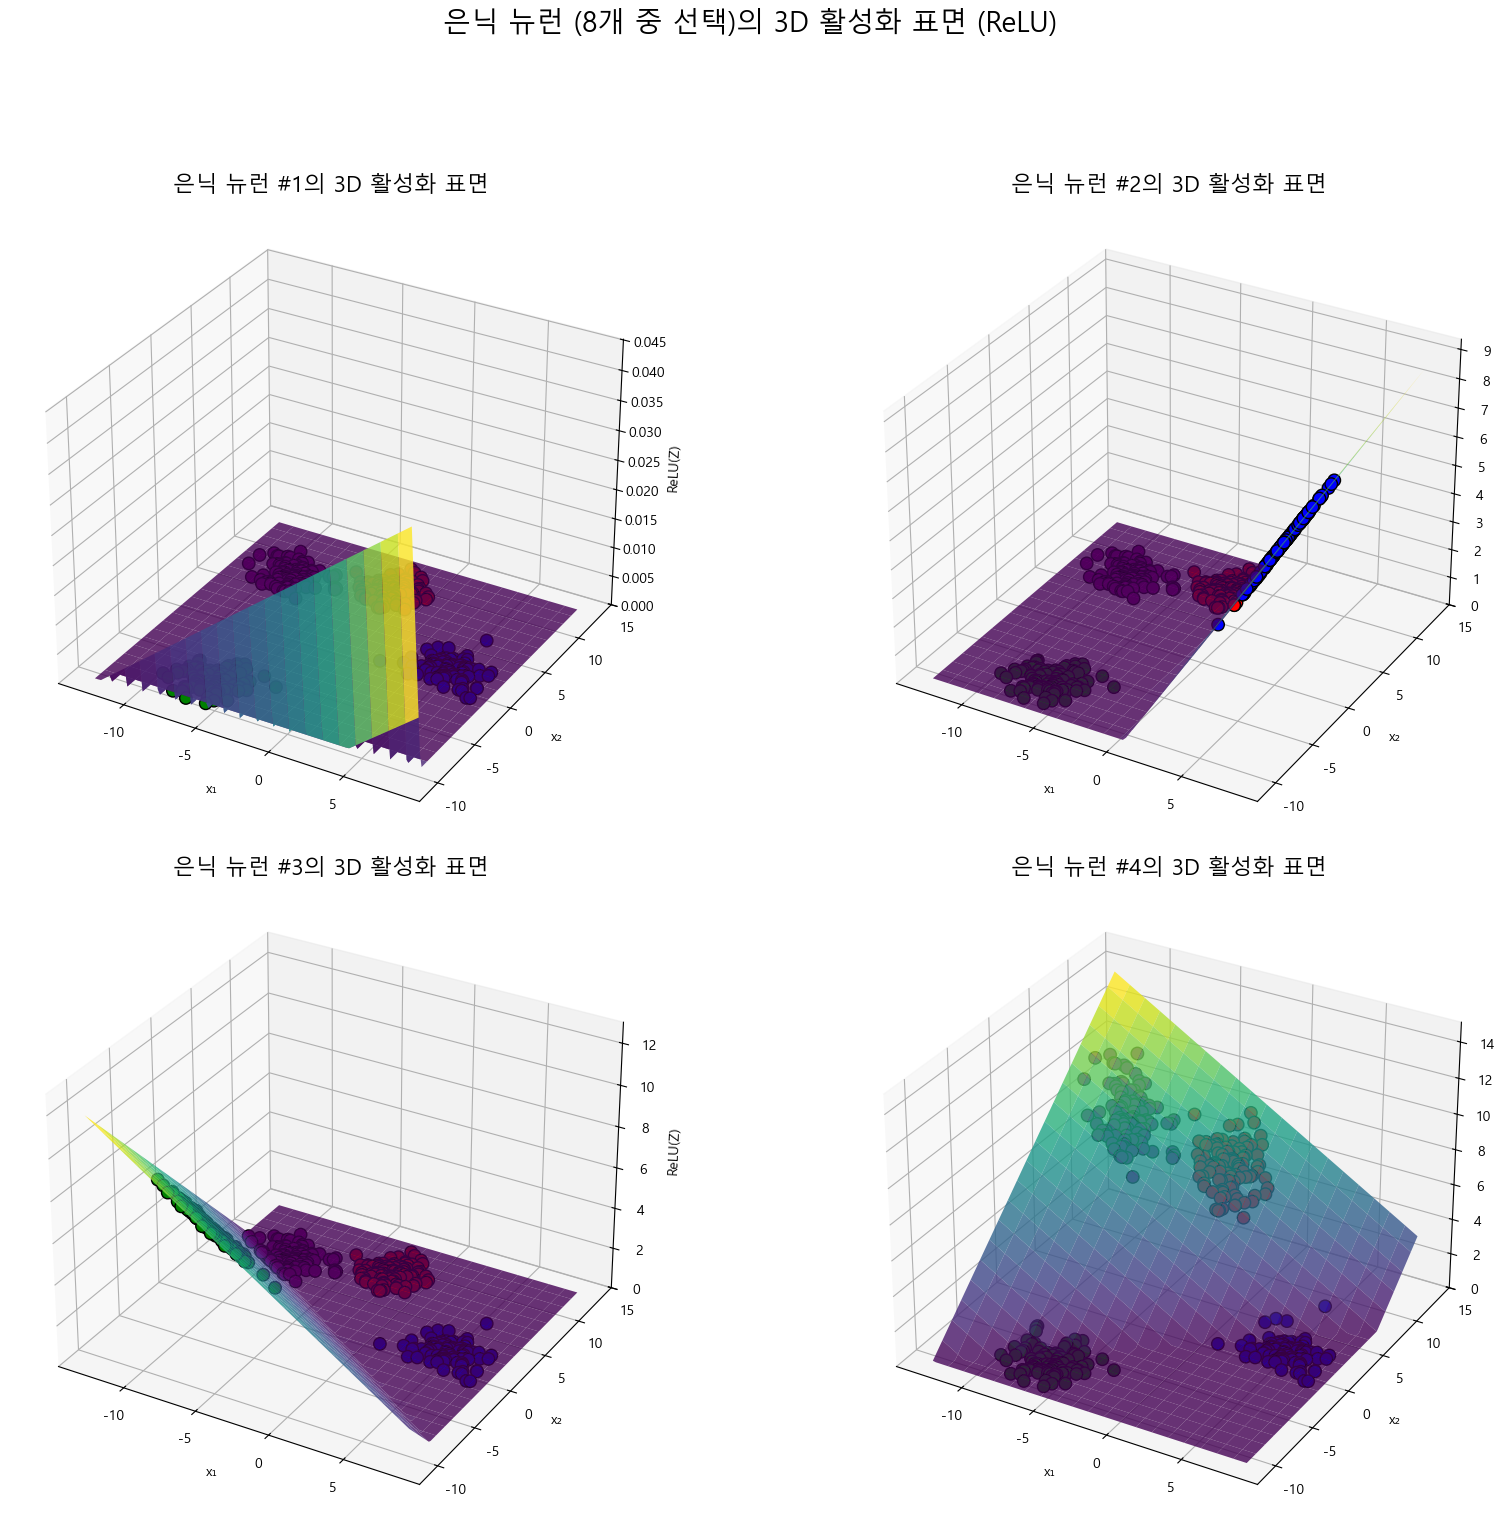

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
import warnings
from mpl_toolkits.mplot3d import Axes3D # 3D 플롯을 위한 import

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except:
            pass
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성
# ------------------------------------------------
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)
colors_data = ['red', 'blue', 'green', 'purple'] # 4개 클래스에 맞는 색상
scatter_colors = [colors_data[label] for label in y]

# ------------------------------------------------
# 2. 모델 정의 및 학습 (은닉층 1개, 뉴런 8개)
# ------------------------------------------------
NEURONS = 8
RANDOM_SEED = 1
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,),
                            activation='relu', # ReLU 활성화 함수 사용
                            solver='adam',
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# -------------------------------
# 3. 시각화용 격자
# -------------------------------
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------------------
# 4. 은닉 뉴런의 '내부' 시각화
# -------------------------------

W1 = mlp_1_layer.coefs_[0]       # (2, 8)
b1 = mlp_1_layer.intercepts_[0]   # (8,)

# 시각화할 뉴런 인덱스 (가장 특징적으로 보이는 몇 개 선택)
# 모든 8개를 그리면 너무 복잡해져서 몇 개만 예시로
selected_neurons_idx = [0, 1, 2, 3] # 첫 4개 뉴런 선택

fig = plt.figure(figsize=(18, 15))
fig.suptitle(f"은닉 뉴런 ({NEURONS}개 중 선택)의 3D 활성화 표면 (ReLU)", fontsize=20, y=1.02)

for i, neuron_idx in enumerate(selected_neurons_idx):
    # 각 뉴런의 선형 결합 (Z) 계산
    Z_i_linear = grid.dot(W1[:, neuron_idx]) + b1[neuron_idx]
    
    # ReLU 활성화 함수 적용 (Z축 높이)
    A_i_relu = np.maximum(0, Z_i_linear)
    
    # 격자 형태로 변환
    Z_grid = A_i_relu.reshape(xx.shape)
    
    # 3D 플롯 생성
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    # 표면 그리기 (cmap을 통해 높이 시각화)
    ax.plot_surface(xx, yy, Z_grid, cmap='viridis', alpha=0.8, rstride=5, cstride=5)
    
    # 3D 공간에 원본 데이터 점 뿌리기
    # 점의 Z 높이는 해당 위치의 A_i_relu 값 (활성화 정도)
    Z_points_for_scatter = np.maximum(0, X.dot(W1[:, neuron_idx]) + b1[neuron_idx])
    ax.scatter(X[:, 0], X[:, 1], Z_points_for_scatter, c=scatter_colors, s=80, edgecolor='k', depthshade=False)
    
    # 각 뉴런의 '직선 경계'도 3D 공간에 시각화 (Z=0인 평면)
    # Z_i_linear = 0 이 되는 점들을 찾아 3D 선으로 그림
    # 이 부분은 명확한 3D 라인을 그리기가 까다로워 개념적으로만 설명하고 코드는 생략.
    # 하지만 표면이 0으로 잘리는 지점이 그 '직선 경계'입니다.
    
    ax.set_title(f"은닉 뉴런 #{neuron_idx + 1}의 3D 활성화 표면", fontsize=16)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel("ReLU(Z)")
    ax.set_zlim(0, Z_grid.max() * 1.1) # Z축 범위 조정
    ax.view_init(elev=30, azim=-60) # 뷰 각도 조정

plt.tight_layout(rect=[0, 0, 1, 0.95])
